# Problem Statement

The dataset has been taken from UCI machine learning repository. The main objective of the analysis is to perform classification of tumors i.e., benign(B) or malignant(M). A benign tumor is a tumor that does not invade its surrounding tissue or spread around the body. A malignant tumor is a tumor that may invade its surrounding tissue or spread around the body. This dataset consists of 569 rows and 32 columns.

Data Source: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

#### Attribute Informations

1) ID number

2) Diagnosis (M = malignant, B = benign)

3 to 32)                                           
3-12(mean)                                      
13-22(standard error)                                              
23-32(Worst)                                                  
 
Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)

b) texture (standard deviation of gray-scale values)

c) perimeter

d) area

e) smoothness (local variation in radius lengths)

f) compactness (perimeter^2 / area - 1.0)

g) concavity (severity of concave portions of the contour)

h) concave points (number of concave portions of the contour)

i) symmetry

j) fractal dimension ("coastline approximation" - 1)


# Breast Cancer prediction

#### Benign - B  Malignant - M


In [1]:
import pandas as pd
#import pandas_profiling as pp
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

df = pd.read_csv("data/wdbc.data")# importing data
col=['ID','diagnosis','radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave_points_mean', 'symmetry_mean','fractal_dimension_mean',
              'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se',
              'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst','fractal_dimension_worst']
df.columns =col # assign columns to data


 we have 32 columns 

1 - ID
2 - classification data
3-32 - Numerical datas

In [2]:
df.head() #checking if columns are added

ID diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842517         M        20.57         17.77          132.90     1326.0   
1  84300903         M        19.69         21.25          130.00     1203.0   
2  84348301         M        11.42         20.38           77.58      386.1   
3  84358402         M        20.29         14.34          135.10     1297.0   
4    843786         M        12.45         15.70           82.57      477.1   

   smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
0          0.08474           0.07864          0.0869              0.07017   
1          0.10960           0.15990          0.1974              0.12790   
2          0.14250           0.28390          0.2414              0.10520   
3          0.10030           0.13280          0.1980              0.10430   
4          0.12780           0.17000          0.1578              0.08089   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...         24.99          23.41           158.80      1956.0   
1  ...         23.57          25.53           152.50      1709.0   
2  ...         14.91          26.50            98.87       567.7   
3  ...         22.54          16.67           152.20      1575.0   
4  ...         15.47          23.75           103.40       741.6   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1238             0.1866           0.2416                0.1860   
1            0.1444             0.4245           0.4504                0.2430   
2            0.2098             0.8663           0.6869                0.2575   
3            0.1374             0.2050           0.4000                0.1625   
4            0.1791             0.5249           0.5355                0.1741   

   symmetry_worst  fractal_dimension_worst  
0          0.2750                  0.08902  
1          0.3613                  0.08758  
2          0.6638                  0.17300  
3          0.2364                  0.07678  
4          0.3985                  0.12440  

[5 rows x 32 columns]

In [3]:
df.info() #getting info from data like datatype , null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       568 non-null    int64  
 1   diagnosis                568 non-null    object 
 2   radius_mean              568 non-null    float64
 3   texture_mean             568 non-null    float64
 4   perimeter_mean           568 non-null    float64
 5   area_mean                568 non-null    float64
 6   smoothness_mean          568 non-null    float64
 7   compactness_mean         568 non-null    float64
 8   concavity_mean           568 non-null    float64
 9   concave_points_mean      568 non-null    float64
 10  symmetry_mean            568 non-null    float64
 11  fractal_dimension_mean   568 non-null    float64
 12  radius_se                568 non-null    float64
 13  texture_se               568 non-null    float64
 14  perimeter_se             5

In [4]:
df.describe() #getting described data

ID  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.680000e+02   568.000000    568.000000      568.000000   568.000000   
mean   3.042382e+07    14.120491     19.305335       91.914754   654.279754   
std    1.251246e+08     3.523416      4.288506       24.285848   351.923751   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692225e+05    11.697500     16.177500       75.135000   420.175000   
50%    9.061570e+05    13.355000     18.855000       86.210000   548.750000   
75%    8.825022e+06    15.780000     21.802500      103.875000   782.625000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
count       568.000000        568.000000      568.000000           568.000000   
mean          0.096321          0.104036        0.088427             0.048746   
std           0.014046          0.052355        0.079294             0.038617   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086290          0.064815        0.029540             0.020310   
50%           0.095865          0.092525        0.061400             0.033455   
75%           0.105300          0.130400        0.129650             0.073730   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
count     568.000000  ...     568.00000     568.000000       568.000000   
mean        0.181055  ...      16.25315      25.691919       107.125053   
std         0.027319  ...       4.82232       6.141662        33.474687   
min         0.106000  ...       7.93000      12.020000        50.410000   
25%         0.161900  ...      13.01000      21.095000        84.102500   
50%         0.179200  ...      14.96500      25.425000        97.655000   
75%         0.195625  ...      18.76750      29.757500       125.175000   
max         0.304000  ...      36.04000      49.540000       251.200000   

        area_worst  smoothness_worst  compactness_worst  concavity_worst  \
count   568.000000        568.000000         568.000000       568.000000   
mean    878.578873          0.132316           0.253541         0.271414   
std     567.846267          0.022818           0.156523         0.207989   
min     185.200000          0.071170           0.027290         0.000000   
25%     514.975000          0.116600           0.146900         0.114475   
50%     685.550000          0.131300           0.211850         0.226550   
75%    1073.500000          0.146000           0.337600         0.381400   
max    4254.000000          0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  
count            568.000000      568.000000               568.000000  
mean               0.114341        0.289776                 0.083884  
std                0.065484        0.061508                 0.018017  
min                0.000000        0.156500                 0.055040  
25%                0.064730        0.250350                 0.071412  
50%                0.099840        0.282050                 0.080015  
75%                0.161325        0.317675                 0.092065  
max                0.291000        0.663800                 0.207500  

[8 rows x 31 columns]

In [5]:
df.isnull().sum() #checking for null values

ID                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [6]:
df['diagnosis'].value_counts() #counting B and M values to avoid baised model

B    357
M    211
Name: diagnosis, dtype: int64

## Hist Plots

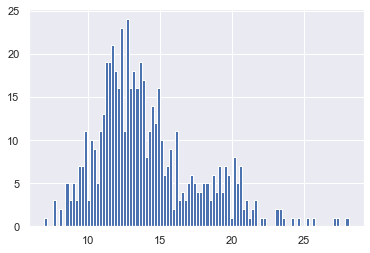

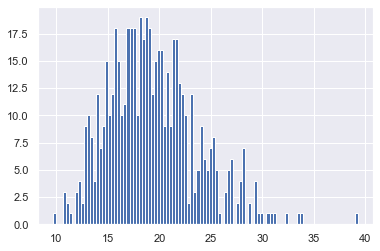

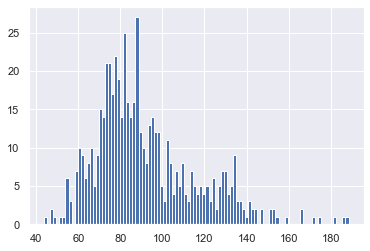

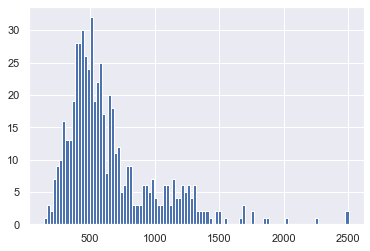

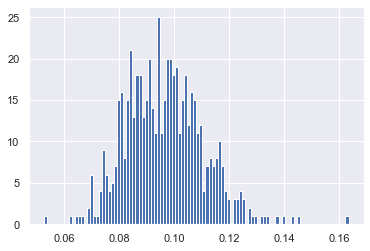

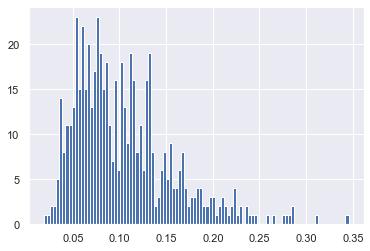

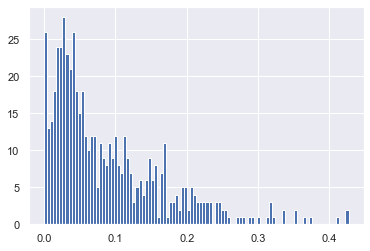

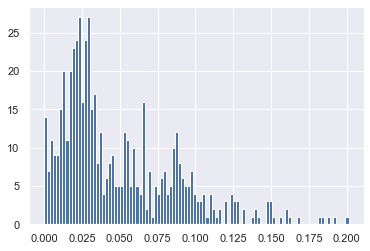

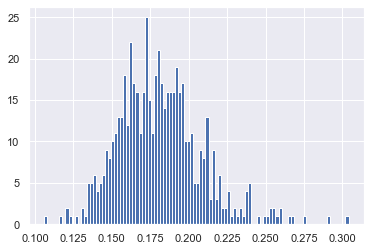

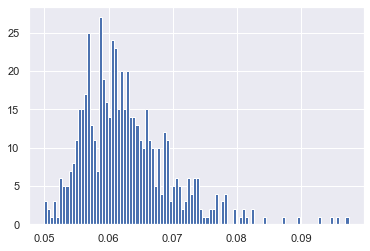

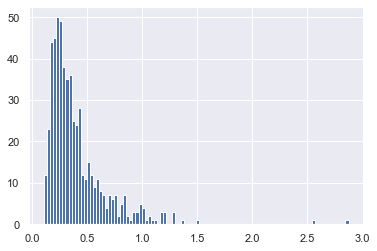

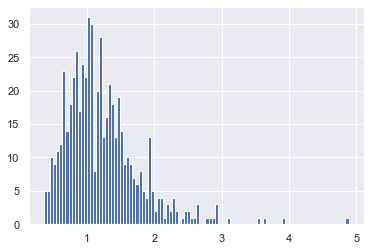

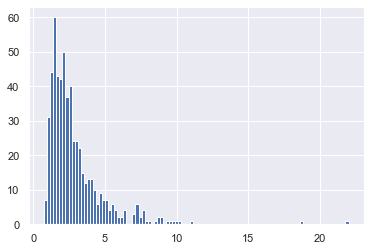

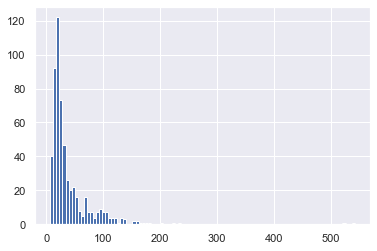

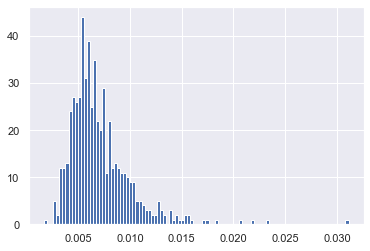

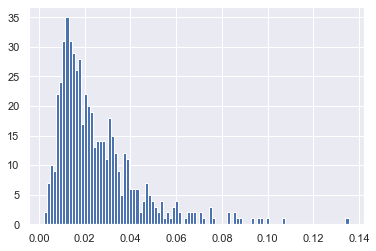

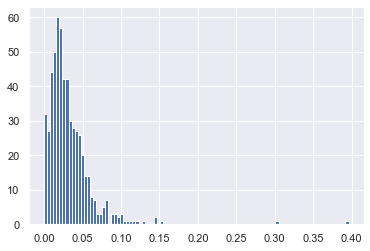

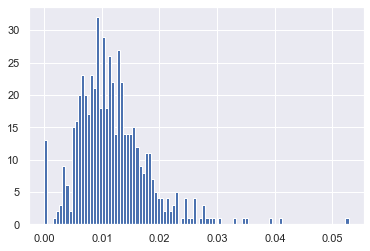

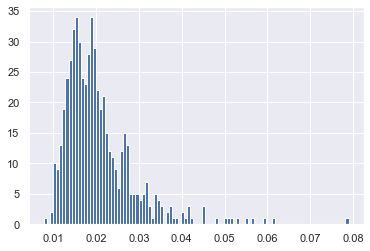

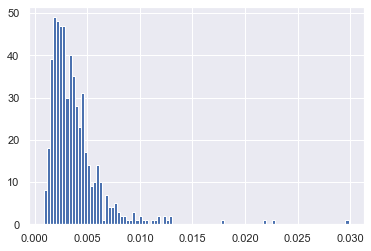

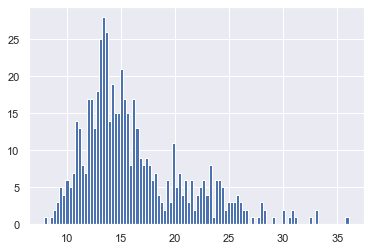

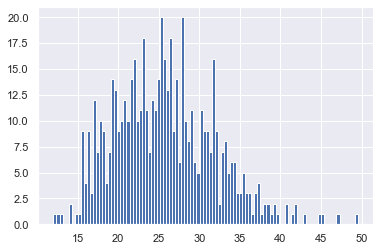

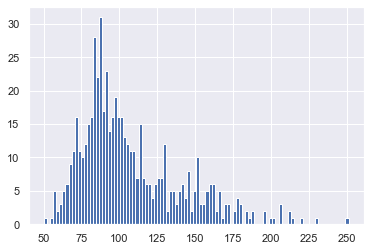

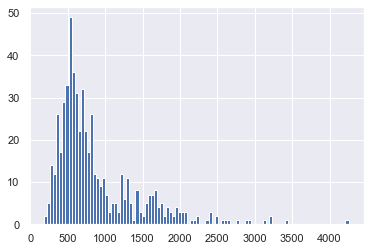

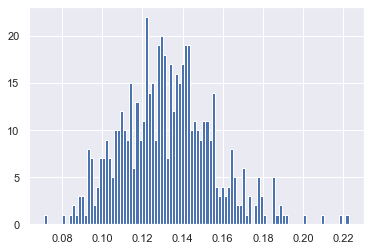

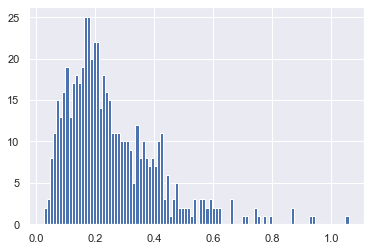

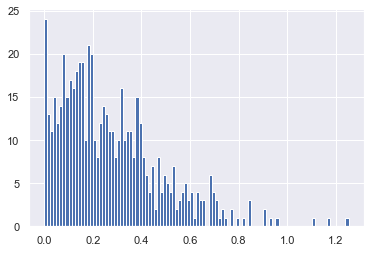

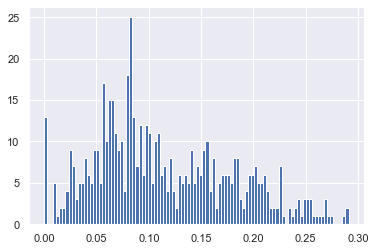

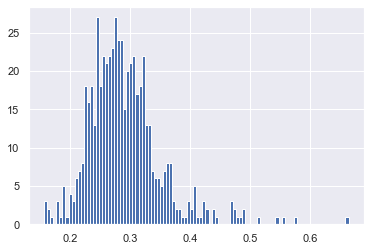

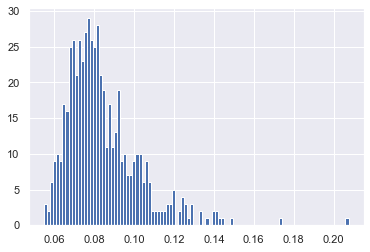

<Figure size 432x288 with 0 Axes>

In [7]:
for i in col[2:]:
    df[i].hist(bins=100)
    plt.show()
    plt.savefig('image/visual/Hist Plot/'+i+'.png')

From the plot we can say columns are normally distributed

## Pairplots

Pairplot is used to check distribution of data

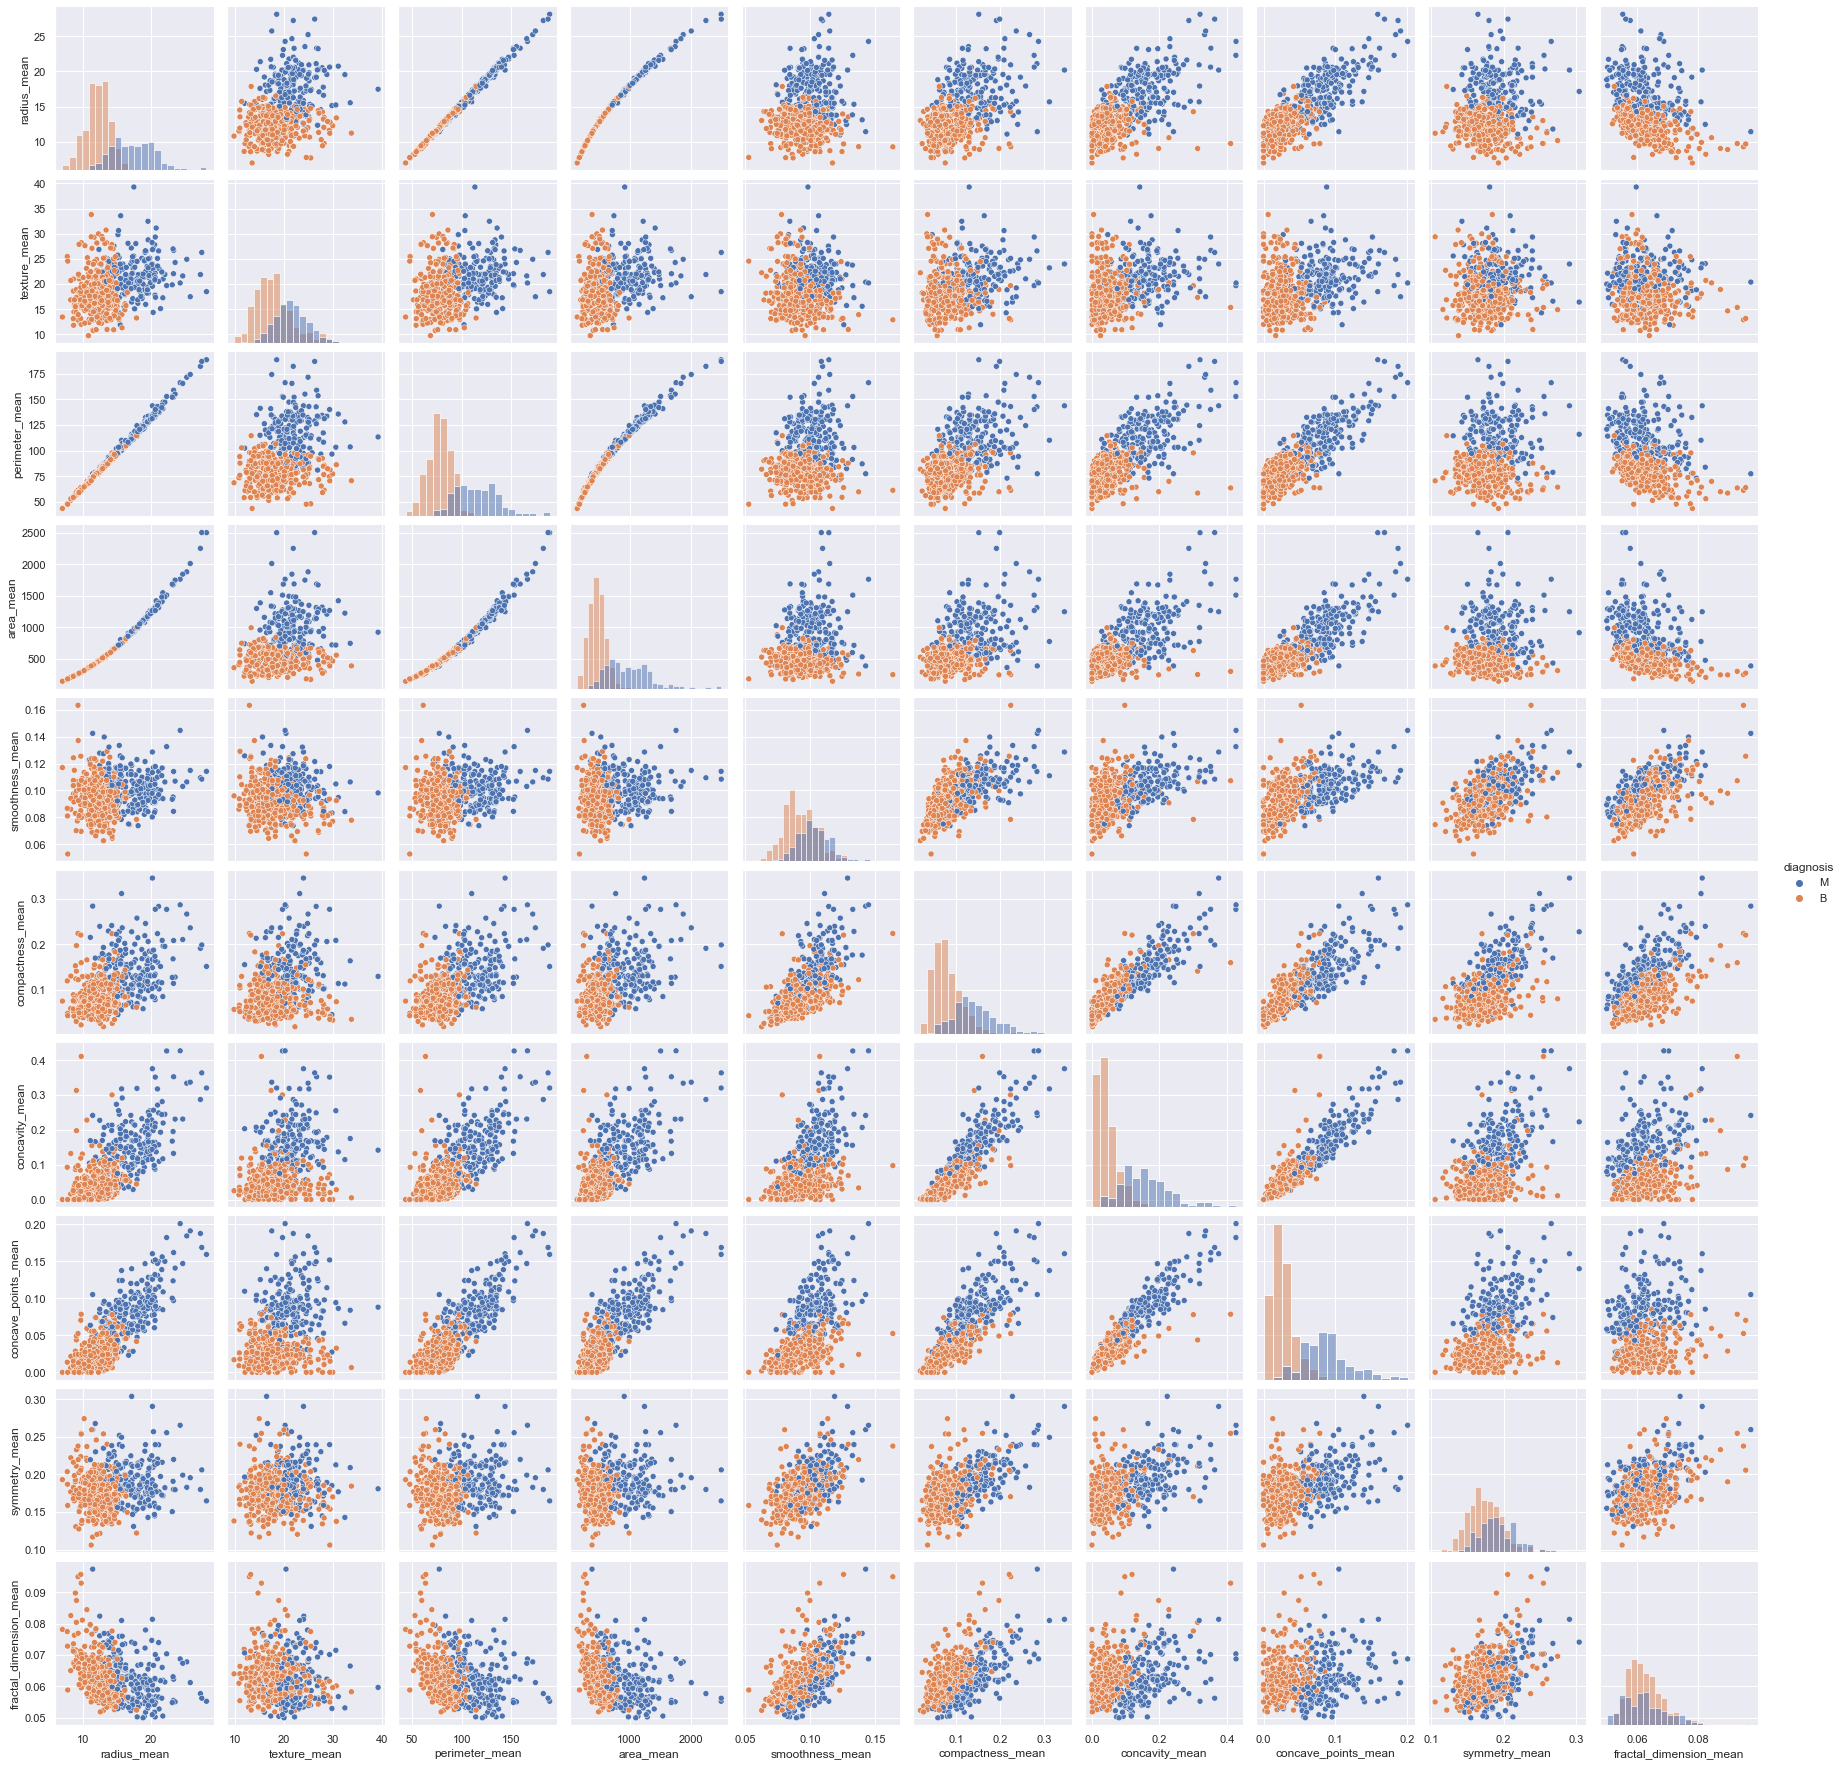

In [8]:
means=sns.pairplot(df,hue='diagnosis',vars=col[2:12],diag_kind='hist',kind='scatter')
#fig=means.get_figure()
plt.savefig('image/visual/Pair Plot/plot.png')

From the plot we can say perimeter,area and radius are correlated

In [9]:
#se=sns.pairplot(df,hue='diagnosis',vars=col[12:22],diag_kind='kde',kind='scatter')
#plt.savefig('se.png')

In [10]:
#w=sns.pairplot(df,hue='diagnosis',vars=col[22:32],diag_kind='hist',kind='scatter')
#plt.savefig('w.png')

## ECDF plots

ECDF plot is used to get cumulative distribution function of the distribution

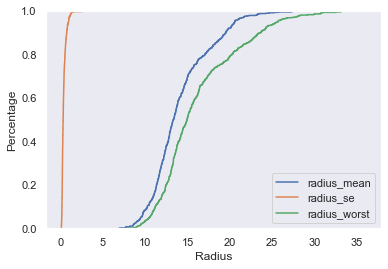

<Figure size 432x288 with 0 Axes>

In [11]:
for i in col[2:32:10]:#getting radius based columns only(radius_mean,radius_se,radius_worst)
    sns.ecdfplot(df,x=i)
plt.legend(labels=col[2:32:10])
plt.xlabel('Radius')
plt.ylabel('Percentage')
plt.grid(color='grey')
plt.show()
plt.savefig('image/visual/ECDF plot/Radius.png')

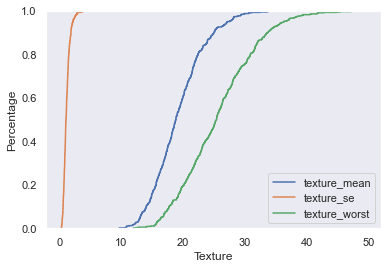

<Figure size 432x288 with 0 Axes>

In [12]:
for i in col[3:32:10]:
    sns.ecdfplot(df,x=i)
plt.legend(labels=col[3:32:10])
plt.grid(color='grey')
plt.xlabel('Texture')
plt.ylabel('Percentage')
plt.show()
plt.savefig('image/visual/ECDF plot/Texture.png')

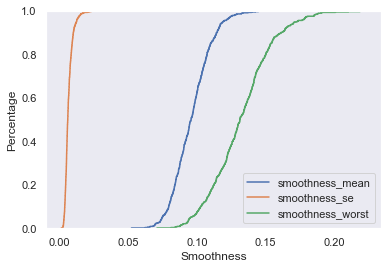

<Figure size 432x288 with 0 Axes>

In [13]:
for i in col[6:32:10]:
    sns.ecdfplot(df,x=i)
plt.legend(labels=col[6:32:10])
plt.xlabel('Smoothness')
plt.ylabel('Percentage')
plt.grid(color='grey')
plt.show()
plt.savefig('image/visual/ECDF plot/Smoothness.png')

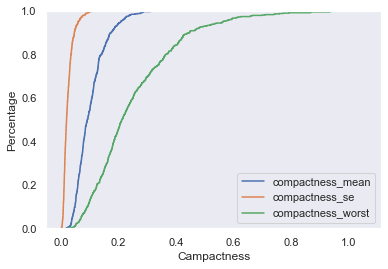

<Figure size 432x288 with 0 Axes>

In [14]:
for i in col[7:32:10]:
    sns.ecdfplot(df,x=i)
plt.legend(labels=col[7:32:10])
plt.xlabel('Campactness')
plt.ylabel('Percentage')
plt.grid(color='grey')
plt.show()
plt.savefig('image/visual/ECDF plot/Compactness.png')

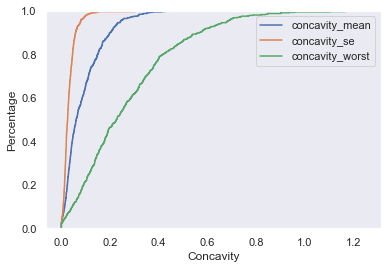

<Figure size 432x288 with 0 Axes>

In [15]:
for i in col[8:32:10]:
    sns.ecdfplot(df,x=i)
plt.legend(labels=col[8:32:10])
plt.xlabel('Concavity')
plt.ylabel('Percentage')
plt.grid(color='grey')
plt.show()
plt.savefig('image/visual/ECDF plot/Concavity.png')

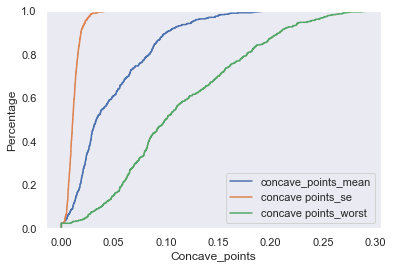

<Figure size 432x288 with 0 Axes>

In [16]:
for i in col[9:32:10]:
    sns.ecdfplot(df,x=i)
plt.legend(labels=col[9:32:10])
plt.xlabel('Concave_points')
plt.ylabel('Percentage')
plt.grid(color='grey')
plt.show()
plt.savefig('image/visual/ECDF plot/Concave_points.png')

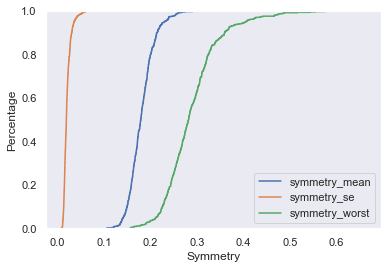

<Figure size 432x288 with 0 Axes>

In [17]:
for i in col[10:32:10]:
    sns.ecdfplot(df,x=i)
plt.legend(labels=col[10:32:10])
plt.xlabel('Symmetry')
plt.ylabel('Percentage')
plt.grid(color='grey')
plt.show()
plt.savefig('image/visual/ECDF plot/Symmetry.png')

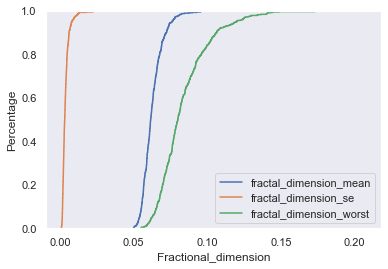

<Figure size 432x288 with 0 Axes>

In [18]:
for i in col[11:32:10]:
    sns.ecdfplot(df,x=i)
plt.legend(labels=col[11:32:10])
plt.xlabel('Fractional_dimension')
plt.ylabel('Percentage')
plt.grid(color='grey')
plt.show()
plt.savefig('image/visual/ECDF plot/Fractional_dimension.png')

from plot we can know cumulative values of distribution in columns

# Bar plots

Bar plot is used to compare diagnosis with each other columns

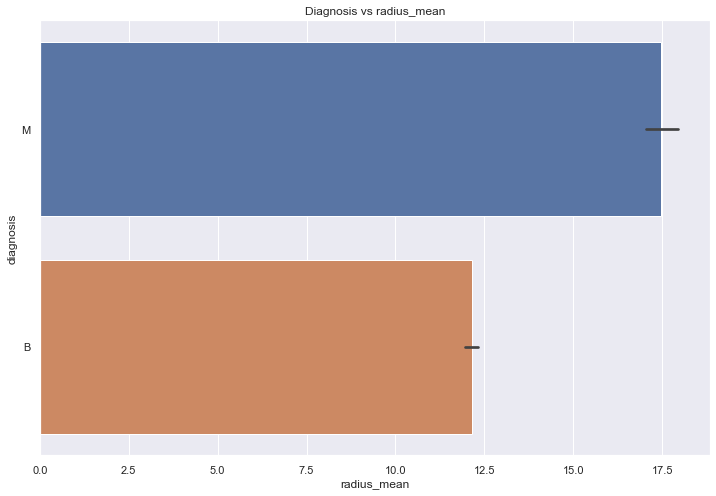

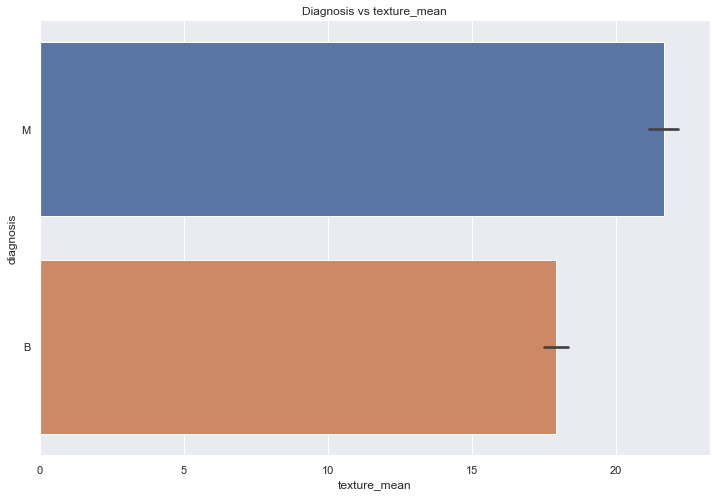

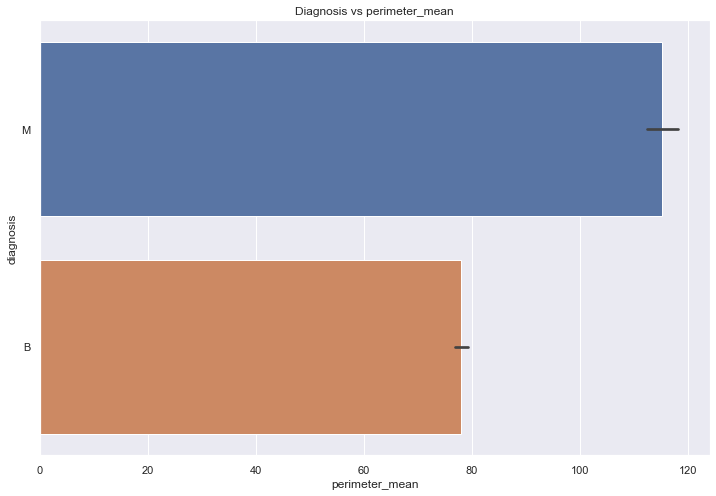

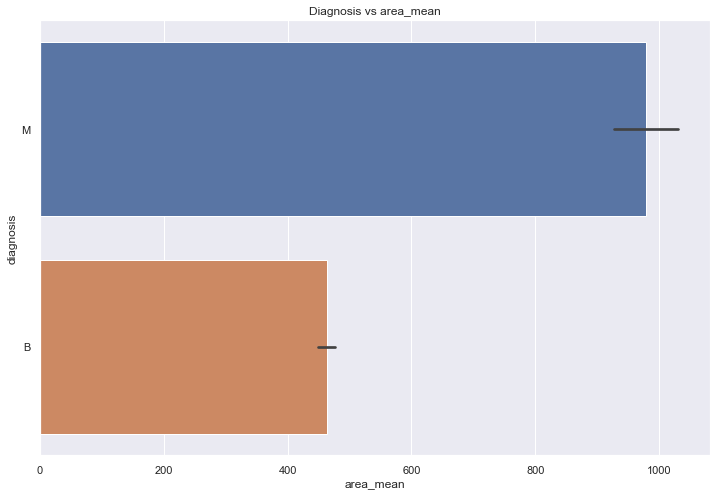

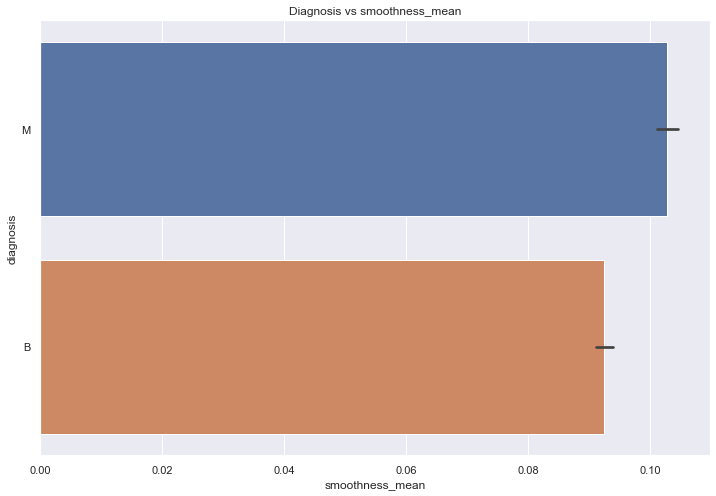

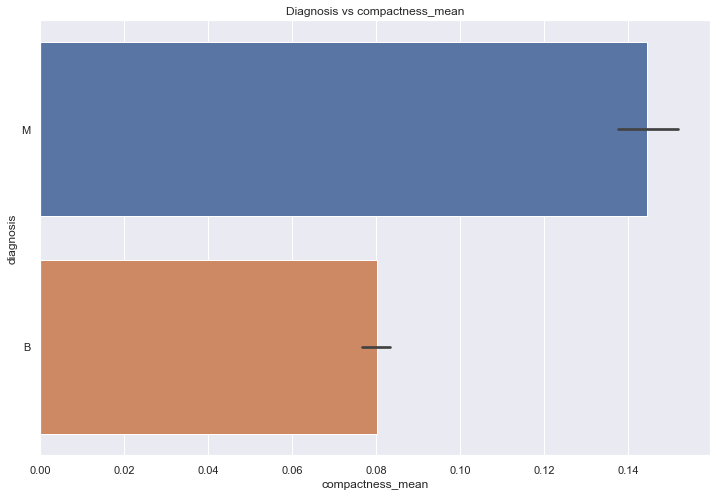

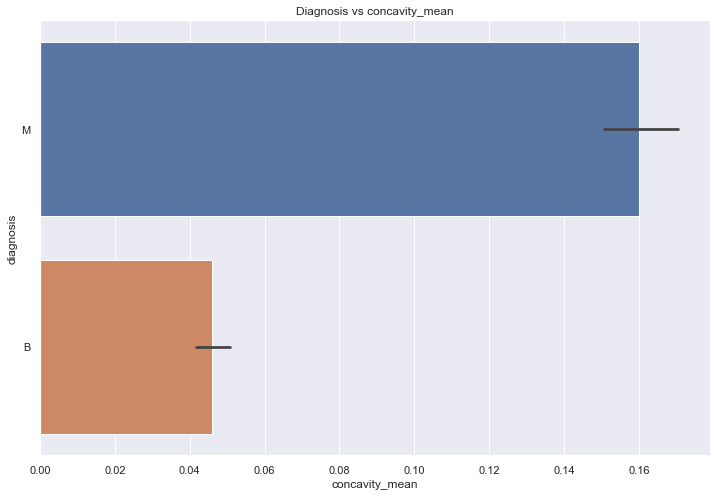

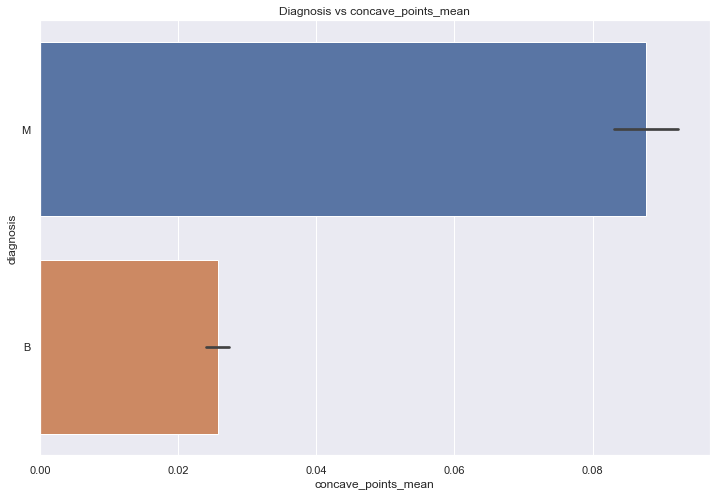

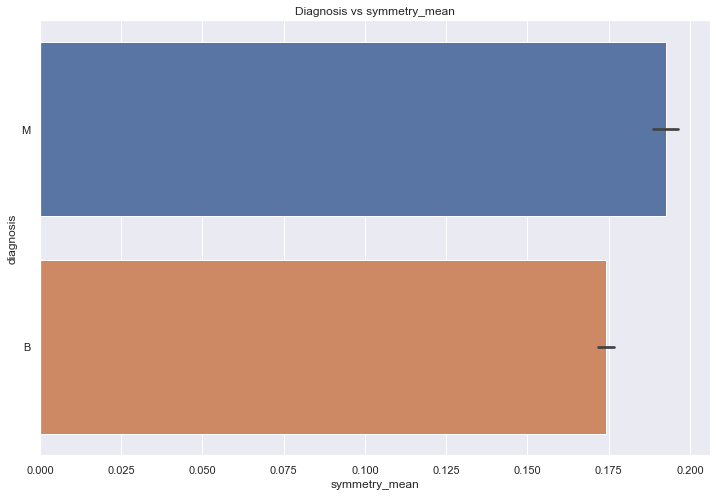

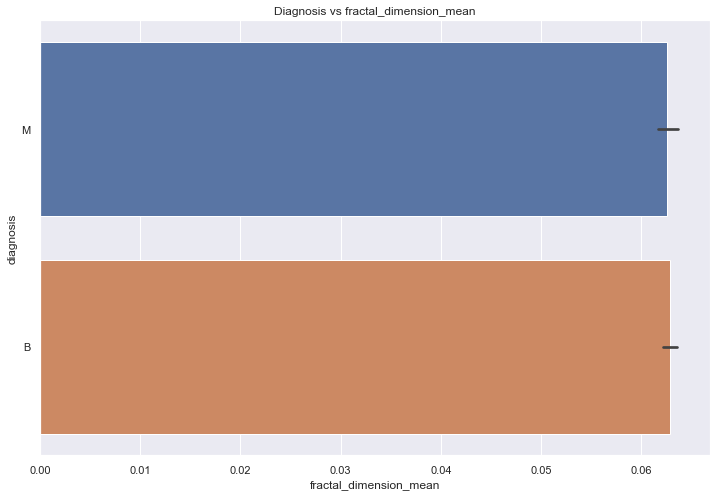

In [19]:
for i in range(2,12):
    fig = plt.figure(figsize = (12,8))
    sns.barplot(y = 'diagnosis', x = col[i], data = df)

    plt.title('Diagnosis vs '+col[i])
    plt.savefig('image/visual/Barplot/'+col[i]+'.jpeg')

## Data Correlation

In [20]:
mean=col[1:12] # getting mean values to future evaluvation
#because standard error and worst are metrics for mean values so mean is enough for our evalution

In [21]:
dataset = df[mean]# assigning data

In [22]:
corr=dataset.corr()#correlation values for dataset
mask = np.tril(np.ones_like(corr)) #getting only lower triangle

corr * mask

radius_mean  texture_mean  perimeter_mean  area_mean  \
radius_mean                1.000000      0.000000        0.000000   0.000000   
texture_mean               0.329383      1.000000        0.000000   0.000000   
perimeter_mean             0.997876      0.335918        1.000000   0.000000   
area_mean                  0.987344      0.326193        0.986548   1.000000   
smoothness_mean            0.168094     -0.017769        0.204505   0.174838   
compactness_mean           0.505129      0.252038        0.555676   0.497981   
concavity_mean             0.676557      0.315248        0.715662   0.686232   
concave_points_mean        0.823165      0.305590        0.851338   0.824246   
symmetry_mean              0.144236      0.080146        0.179100   0.148219   
fractal_dimension_mean    -0.317749     -0.068771       -0.268103  -0.288560   

                        smoothness_mean  compactness_mean  concavity_mean  \
radius_mean                    0.000000          0.000000        0.000000   
texture_mean                  -0.000000          0.000000        0.000000   
perimeter_mean                 0.000000          0.000000        0.000000   
area_mean                      0.000000          0.000000        0.000000   
smoothness_mean                1.000000          0.000000        0.000000   
compactness_mean               0.657741          1.000000        0.000000   
concavity_mean                 0.519002          0.881619        1.000000   
concave_points_mean            0.551009          0.829050        0.920462   
symmetry_mean                  0.555259          0.598095        0.495525   
fractal_dimension_mean         0.582435          0.560161        0.329768   

                        concave_points_mean  symmetry_mean  \
radius_mean                        0.000000       0.000000   
texture_mean                       0.000000       0.000000   
perimeter_mean                     0.000000       0.000000   
area_mean                          0.000000       0.000000   
smoothness_mean                    0.000000       0.000000   
compactness_mean                   0.000000       0.000000   
concavity_mean                     0.000000       0.000000   
concave_points_mean                1.000000       0.000000   
symmetry_mean                      0.457171       1.000000   
fractal_dimension_mean             0.158464       0.475301   

                        fractal_dimension_mean  
radius_mean                               -0.0  
texture_mean                              -0.0  
perimeter_mean                            -0.0  
area_mean                                 -0.0  
smoothness_mean                            0.0  
compactness_mean                           0.0  
concavity_mean                             0.0  
concave_points_mean                        0.0  
symmetry_mean                              0.0  
fractal_dimension_mean                     1.0

### Heat map for correlation of dataset

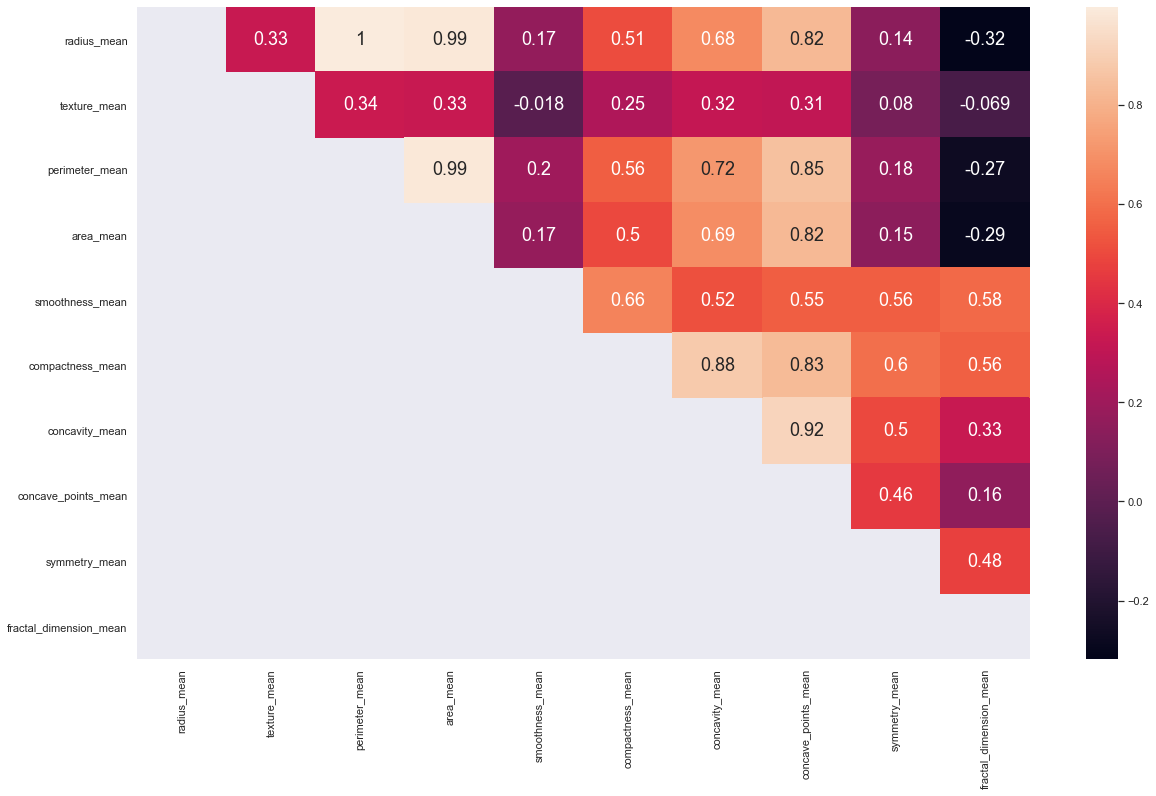

In [23]:
plt.figure(figsize=(20,12))
sns.heatmap(corr,mask=mask,annot=True,annot_kws={'size': 18})
plt.savefig('image/selection/heatmap_correlation.png')

#### Function to get correlated columns

In [24]:
def correlation(dataset, threshold):
    col_corr = set()  #The names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if corr_matrix.iloc[i, j] > threshold: # for getting absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of columns
                col_corr.add(colname)
    return col_corr


In [25]:
cor_fe = correlation(dataset,0.8)#passing the dataset and thresold

In [26]:
cor_fe,len(cor_fe)

({'area_mean', 'concave_points_mean', 'concavity_mean', 'perimeter_mean'}, 4)

Data column dropping

In [27]:
dataset = dataset.drop(cor_fe,axis=1)#dropping correlated columns
print(dataset.columns)
y=dataset['diagnosis'] #assign diagnosis column to y
y.shape

Index(['diagnosis', 'radius_mean', 'texture_mean', 'smoothness_mean',
       'compactness_mean', 'symmetry_mean', 'fractal_dimension_mean'],
      dtype='object')


(568,)

In [28]:
dfm=dataset[dataset['diagnosis']=='M']#getting M data
dfb=dataset[dataset['diagnosis']=='B']#getting B data

# Box plot

Box plot to see sections of data for each column in dataset and to identity outlier

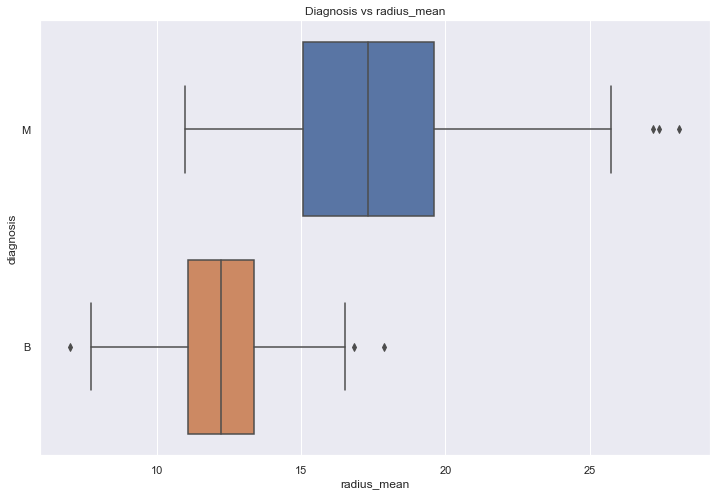

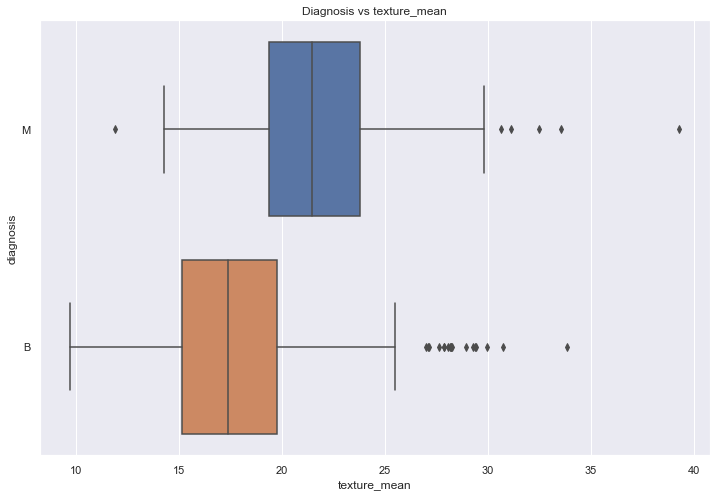

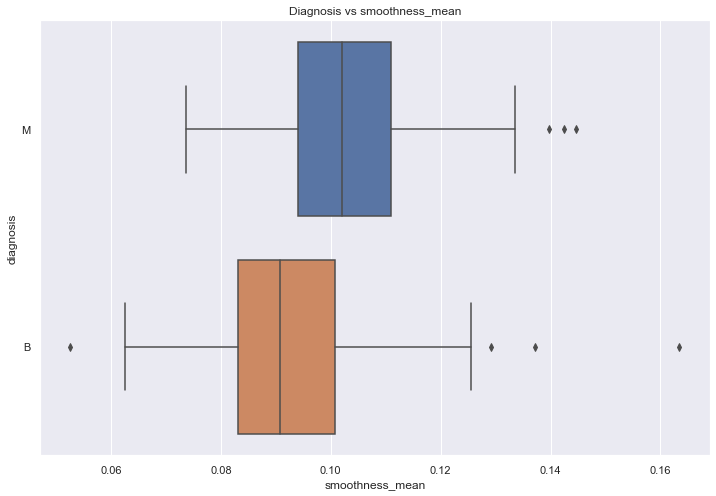

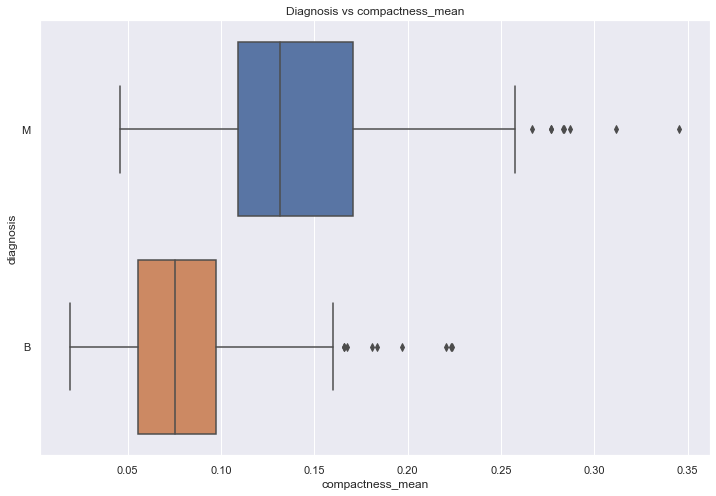

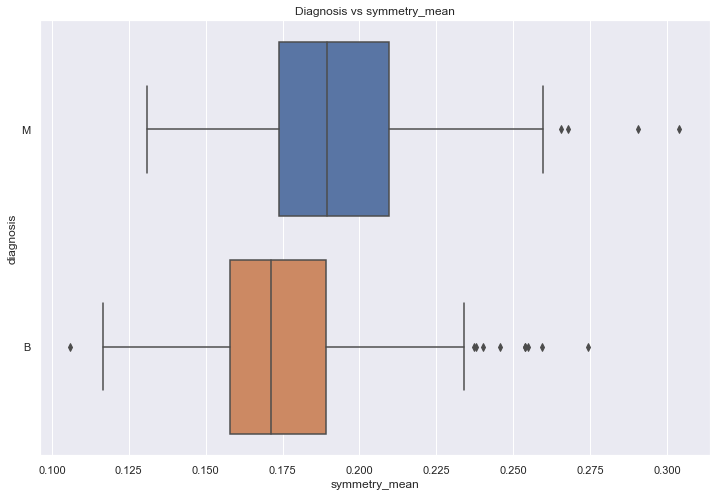

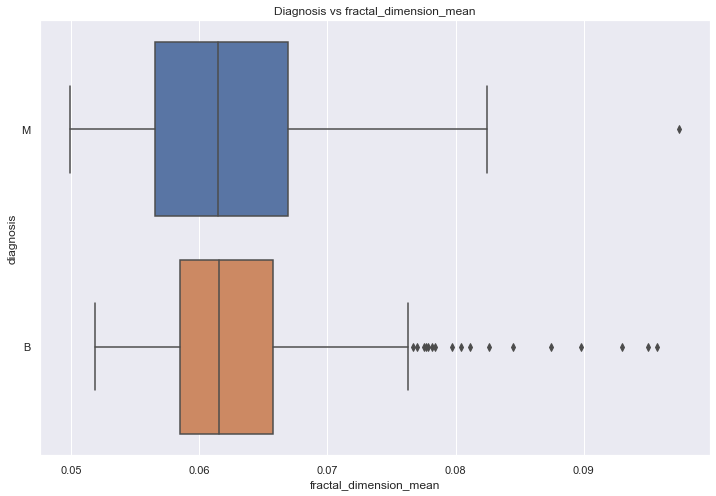

In [29]:
for i in dataset.columns[1:]:
    fig = plt.figure(figsize = (12,8))
    sns.boxplot(y = 'diagnosis', x = i, data = dataset)

    plt.title('Diagnosis vs '+i)
    plt.savefig('image/visual/Box plot/'+i+'.jpeg')

Outlier correction using Quantile function.
quantile function -  return conditional median value.
we replace outliers with minimum and maximum margin values


Radius mean outlier correction

In [30]:

#x=dfm['radius_mean'].quantile(0.03)
y=dfm['radius_mean'].quantile(0.98)
#dfm['radius_mean'] = np.where(dfm['radius_mean'] <x, x,dfm['radius_mean']) replacing lower outlier with conditional median value
dfm['radius_mean'] = np.where(dfm['radius_mean'] >y, y,dfm['radius_mean']) # replacing upper outlier with conditional median value

x=dfb['radius_mean'].quantile(0.01)
y=dfb['radius_mean'].quantile(0.996)
dfb['radius_mean'] = np.where(dfb['radius_mean'] <x, x,dfb['radius_mean'])
dfb['radius_mean'] = np.where(dfb['radius_mean'] >y, y,dfb['radius_mean'])


<ipython-input-30-4d5f64a9c107>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfm['radius_mean'] = np.where(dfm['radius_mean'] >y, y,dfm['radius_mean']) # replacing upper outlier with conditional median value
<ipython-input-30-4d5f64a9c107>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfb['radius_mean'] = np.where(dfb['radius_mean'] <x, x,dfb['radius_mean'])
<ipython-input-30-4d5f64a9c107>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

Texture mean outlier correction

In [31]:
x=dfm['texture_mean'].quantile(0.01)
y=dfm['texture_mean'].quantile(0.97)
dfm['texture_mean'] = np.where(dfm['texture_mean'] <x, x,dfm['texture_mean']) #
dfm['texture_mean'] = np.where(dfm['texture_mean'] >y, y,dfm['texture_mean'])

#x=dfb['texture_mean'].quantile(0.001)
y=dfb['texture_mean'].quantile(0.95)
#dfb['texture_mean'] = np.where(dfb['texture_mean'] <x, x,dfb['texture_mean'])
dfb['texture_mean'] = np.where(dfb['texture_mean'] >y, y,dfb['texture_mean'])

<ipython-input-31-cb11dc291265>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfm['texture_mean'] = np.where(dfm['texture_mean'] <x, x,dfm['texture_mean']) #
<ipython-input-31-cb11dc291265>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfm['texture_mean'] = np.where(dfm['texture_mean'] >y, y,dfm['texture_mean'])
<ipython-input-31-cb11dc291265>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

Smoothness mean outlier correction

In [32]:
#x=dfm['smoothness_mean'].quantile(0.00)
y=dfm['smoothness_mean'].quantile(0.98)
#dfm['smoothness_mean'] = np.where(dfm['smoothness_mean'] <x, x,dfm['smoothness_mean'])
dfm['smoothness_mean'] = np.where(dfm['smoothness_mean'] >y, y,dfm['smoothness_mean'])

x=dfb['smoothness_mean'].quantile(0.01)
y=dfb['smoothness_mean'].quantile(0.99)
dfb['smoothness_mean'] = np.where(dfb['smoothness_mean'] <x, x,dfb['smoothness_mean'])
dfb['smoothness_mean'] = np.where(dfb['smoothness_mean'] >y, y,dfb['smoothness_mean'])

<ipython-input-32-4778fb91a615>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfm['smoothness_mean'] = np.where(dfm['smoothness_mean'] >y, y,dfm['smoothness_mean'])
<ipython-input-32-4778fb91a615>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfb['smoothness_mean'] = np.where(dfb['smoothness_mean'] <x, x,dfb['smoothness_mean'])
<ipython-input-32-4778fb91a615>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

Compactness mean outlier correction

In [33]:
#x=dfm['compactness_mean'].quantile(0.00)
y=dfm['compactness_mean'].quantile(0.9625)
#dfm['compactness_mean'] = np.where(dfm['compactness_mean'] <x, x,dfm['compactness_mean'])
dfm['compactness_mean'] = np.where(dfm['compactness_mean'] >y, y,dfm['compactness_mean'])

#x=dfb['compactness_mean'].quantile(0.0)
y=dfb['compactness_mean'].quantile(0.97)
#dfb['compactness_mean'] = np.where(dfb['compactness_mean'] <x, x,dfb['compactness_mean'])
dfb['compactness_mean'] = np.where(dfb['compactness_mean'] >y, y,dfb['compactness_mean'])


<ipython-input-33-1820b60d16ee>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfm['compactness_mean'] = np.where(dfm['compactness_mean'] >y, y,dfm['compactness_mean'])
<ipython-input-33-1820b60d16ee>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfb['compactness_mean'] = np.where(dfb['compactness_mean'] >y, y,dfb['compactness_mean'])


Symmetry mean outlier correction

In [34]:
#x=dfm['symmetry_mean'].quantile(0.03)
y=dfm['symmetry_mean'].quantile(0.975)
#dfm['symmetry_mean'] = np.where(dfm['symmetry_mean'] <x, x,dfm['symmetry_mean'])
dfm['symmetry_mean'] = np.where(dfm['symmetry_mean'] >y, y,dfm['symmetry_mean'])

x=dfb['symmetry_mean'].quantile(0.01)
y=dfb['symmetry_mean'].quantile(0.975)
dfb['symmetry_mean'] = np.where(dfb['symmetry_mean'] <x, x,dfb['symmetry_mean'])
dfb['symmetry_mean'] = np.where(dfb['symmetry_mean'] >y, y,dfb['symmetry_mean'])


<ipython-input-34-5a183af73baa>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfm['symmetry_mean'] = np.where(dfm['symmetry_mean'] >y, y,dfm['symmetry_mean'])
<ipython-input-34-5a183af73baa>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfb['symmetry_mean'] = np.where(dfb['symmetry_mean'] <x, x,dfb['symmetry_mean'])
<ipython-input-34-5a183af73baa>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

Fractal dimension mean outlier correction

In [35]:
#x=dfm['fractal_dimension_mean'].quantile(0.03)
y=dfm['fractal_dimension_mean'].quantile(0.995)
#dfm['fractal_dimension_mean'] = np.where(dfm['fractal_dimension_mean'] <x, x,dfm['fractal_dimension_mean'])
dfm['fractal_dimension_mean'] = np.where(dfm['fractal_dimension_mean'] >y, y,dfm['fractal_dimension_mean'])

#x=dfb['fractal_dimension_mean'].quantile(0.01)
y=dfb['fractal_dimension_mean'].quantile(0.9525)
#dfb['fractal_dimension_mean'] = np.where(dfb['fractal_dimension_mean'] <x, x,dfb['fractal_dimension_mean'])
dfb['fractal_dimension_mean'] = np.where(dfb['fractal_dimension_mean'] >y, y,dfb['fractal_dimension_mean'])


<ipython-input-35-bc4c5b452dab>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfm['fractal_dimension_mean'] = np.where(dfm['fractal_dimension_mean'] >y, y,dfm['fractal_dimension_mean'])
<ipython-input-35-bc4c5b452dab>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfb['fractal_dimension_mean'] = np.where(dfb['fractal_dimension_mean'] >y, y,dfb['fractal_dimension_mean'])


## Joining both M and B data

In [36]:
dataset=pd.concat([dfm,dfb])

In [37]:
dataset.head(5)
# visualizing dataset

diagnosis  radius_mean  texture_mean  smoothness_mean  compactness_mean  \
0         M        20.57        17.770          0.08474          0.078640   
1         M        19.69        21.250          0.10960          0.159900   
2         M        11.42        20.380          0.13254          0.258713   
3         M        20.29        14.411          0.10030          0.132800   
4         M        12.45        15.700          0.12780          0.170000   

   symmetry_mean  fractal_dimension_mean  
0       0.181200                0.056670  
1       0.206900                0.059990  
2       0.256575                0.082379  
3       0.180900                0.058830  
4       0.208700                0.076130

In [38]:
20.57,17.770,0.08474,0.078640,0.1812,0.056670

(20.57, 17.77, 0.08474, 0.07864, 0.1812, 0.05667)

In [39]:
dataset.tail(5)

diagnosis  radius_mean  texture_mean  smoothness_mean  compactness_mean  \
557         B     14.59000         22.68         0.084730           0.13300   
558         B     11.51000         23.93         0.092610           0.10210   
559         B     14.05000         25.79         0.099290           0.11260   
560         B     11.20000         25.79         0.074490           0.03558   
567         B      8.00416         24.54         0.065967           0.04362   

     symmetry_mean  fractal_dimension_mean  
557        0.14540                 0.06147  
558        0.13880                 0.06570  
559        0.15370                 0.06171  
560        0.12178                 0.05502  
567        0.15870                 0.05884

In [40]:
dataset.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'smoothness_mean',
       'compactness_mean', 'symmetry_mean', 'fractal_dimension_mean'],
      dtype='object')

In [41]:
dataset.describe()

radius_mean  texture_mean  smoothness_mean  compactness_mean  \
count   568.000000    568.000000       568.000000        568.000000   
mean     14.107053     19.178569         0.096205          0.102961   
std       3.465040      3.968326         0.013495          0.049809   
min       8.004160      9.710000         0.065967          0.019380   
25%      11.697500     16.177500         0.086290          0.064815   
50%      13.355000     18.855000         0.095865          0.092525   
75%      15.780000     21.802500         0.105300          0.130400   
max      25.102000     29.162000         0.132540          0.258713   

       symmetry_mean  fractal_dimension_mean  
count     568.000000              568.000000  
mean        0.180649                0.062541  
std         0.025931                0.006317  
min         0.121780                0.049960  
25%         0.161900                0.057697  
50%         0.179200                0.061515  
75%         0.195625                0.066120  
max         0.256575                0.082379

###### visualizing corrected(without outliers) data with boxplot

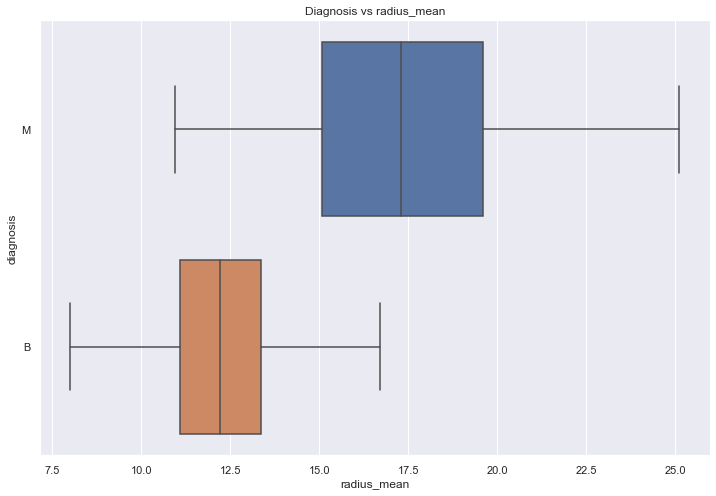

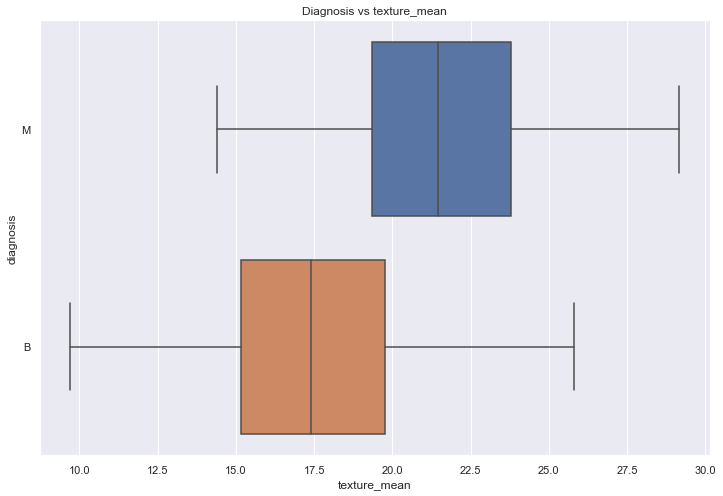

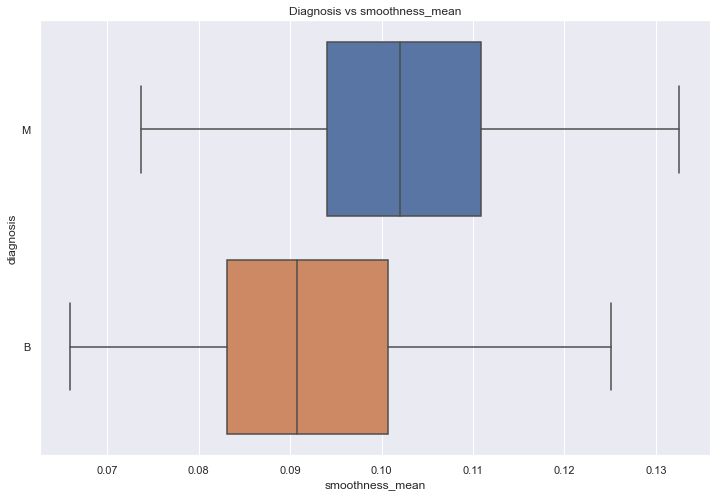

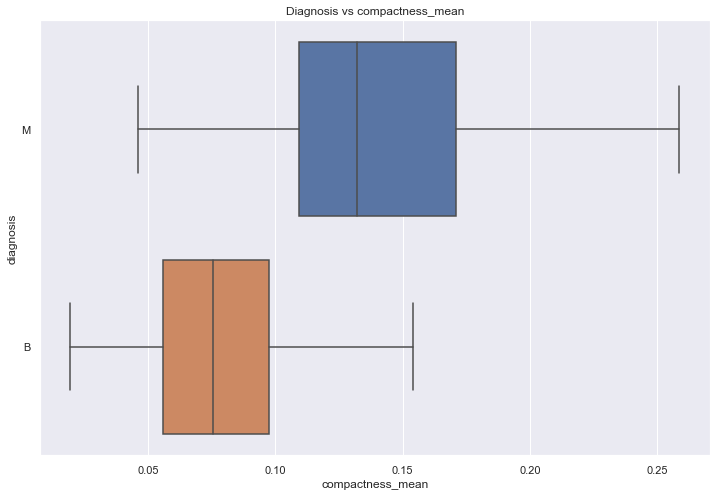

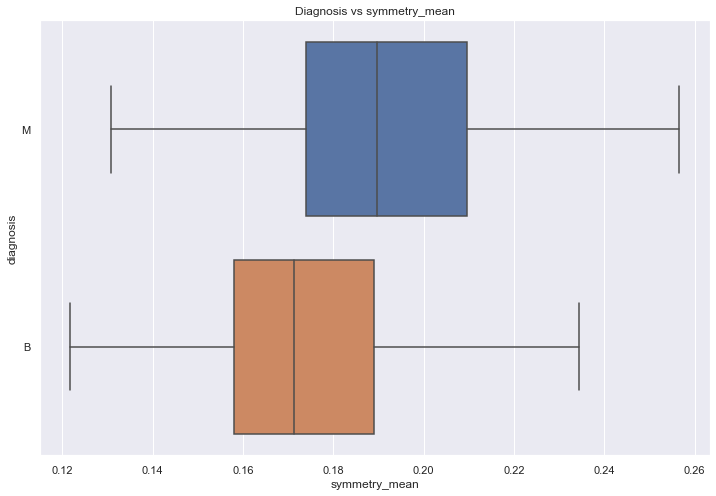

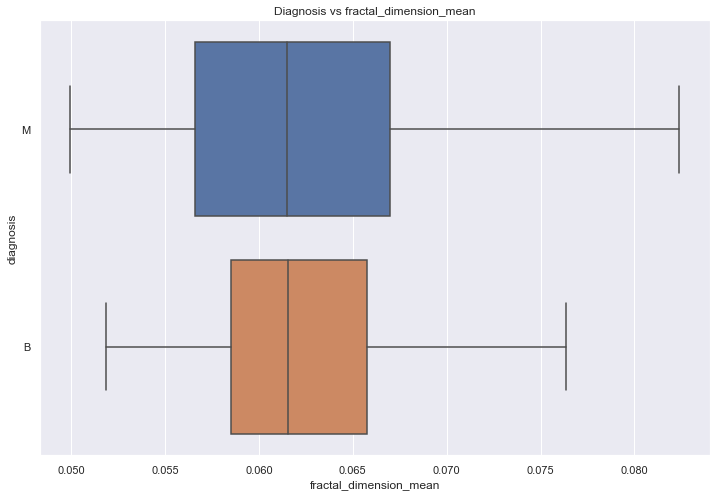

In [42]:
for i in dataset.columns[1:]:
    fig = plt.figure(figsize = (12,8))
    sns.boxplot(y = 'diagnosis', x = i, data = dataset)

    plt.title('Diagnosis vs '+i)
    plt.savefig('image/visual/box_plot_without_outlier/'+i+'.jpeg')

# Importing Classification models

In [43]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler,Normalizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,accuracy_score,f1_score,roc_auc_score,roc_curve,plot_roc_curve,auc
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

## Feature Scaling

In [44]:
x=dataset.drop('diagnosis',axis=1) #input dataset
x.shape

(568, 6)

In [45]:
y=dataset['diagnosis']#output dataset
y.shape

(568,)

Change 'M' and 'B' to '1' and '0' respectively from diagnosis column 

In [46]:
def change(n):
    if n=='M':
        return 1
    else:
        return 0
y=y.apply(change)

In [47]:
sd=StandardScaler() 
x=sd.fit_transform(x) #transforming data to standardized value
x.shape

(568, 6)

### Train test split

In [48]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.40,random_state=32)#spliting train 80% and test 20%
acc_train=[]
acc=[]# accuracy
name=[] # model name
f1m=[] # f1 score M
f1b=[] # f1 score B
roc_auc=[]#roc_auc
cross_score=[]
# all the above list are used for model selection purpose
x.shape

(568, 6)

In [49]:
y_train.value_counts() #getting count of M and B from train data

0    212
1    128
Name: diagnosis, dtype: int64

In [50]:
y_test.value_counts()  #getting count of M and B from test data
x.shape

(568, 6)

# Classification Models

## LogisticRegression

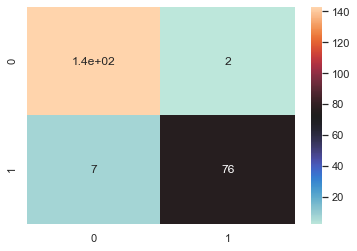

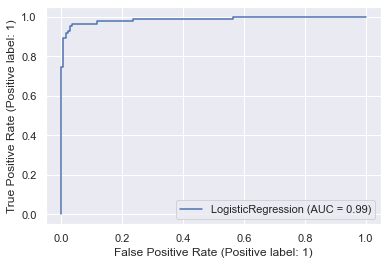

LogisticRegression
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       145
           1       0.97      0.92      0.94        83

    accuracy                           0.96       228
   macro avg       0.96      0.95      0.96       228
weighted avg       0.96      0.96      0.96       228

Accuracy of Test: 0.96

Accuracy of Train: 0.93

F1_score of M 0.9694915254237289

F1_score of B 0.9440993788819876

AUC score 0.9862899875363522

Logistic Regression cross Score 
mean: 0.9331315013196709
min :0.8859649122807017
max :0.956140350877193


In [51]:
lr = LogisticRegression(random_state=32)
lr.fit(x_train,y_train)# fitting the model
y_pred=lr.predict(x_test) #prediction based on x test



f1b.append(f1_score(y_test,y_pred,pos_label=1)) # append f1 score of B 
f1m.append(f1_score(y_test,y_pred,pos_label=0)) # append f1 score of M 
name.append('LogisticRegression')
acc.append(lr.score(x_test,y_test))#append accuracy of test data
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap='icefire')
plt.savefig('image/selection/Heatmap/Logistic_Regression.png')
# visualize confusion matrix in heatmap



auc = roc_auc_score(y_test,lr.predict_proba(x_test)[:, 1])# getting roc curve by predict_proba method
plot_roc_curve(lr,x_test,y_test)
plt.savefig('image/selection/ROC_Curve/Logistic_Regression.png')
plt.show()
roc_auc.append(auc)

print('LogisticRegression')
print(classification_report(y_test,y_pred)) # getting classification report
print('Accuracy of Test: {:.2}'.format(lr.score(x_test,y_test)),end='\n\n')
print('Accuracy of Train: {:.2}'.format(lr.score(x_train,y_train)),end='\n\n')


# getting accuracy
print('F1_score of M',f1_score(y_test,y_pred,pos_label=0),end='\n\n') #getting f1 score for M
print('F1_score of B',f1_score(y_test,y_pred,pos_label=1),end='\n\n')#getting f1 score for M
print('AUC score',auc,end='\n\n')

acc_train.append(lr.score(x_train,y_train))#append accuracy of train data
#print(x.shape)
score=cross_val_score(lr,x,y,cv=5)# calculate cross validation score
#print(x.shape)
print('Logistic Regression cross Score \nmean: {}\nmin :{}\nmax :{}'.format(score.mean(),score.min(),score.max()))
cross_score.append(score.mean())#append the cross validation score 

## KNeighborsClassifier

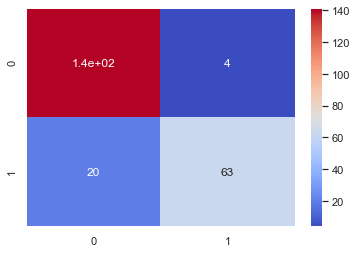

<Figure size 432x288 with 0 Axes>

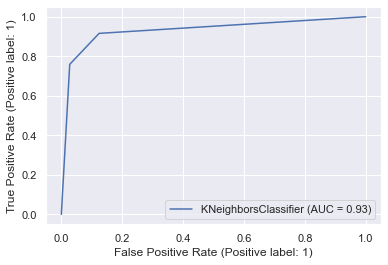

KNeighborsClassifier
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       145
           1       0.94      0.76      0.84        83

    accuracy                           0.89       228
   macro avg       0.91      0.87      0.88       228
weighted avg       0.90      0.89      0.89       228

Accuracy of Test: 0.89

Accuracy of Train: 0.94

F1_score of M 0.9215686274509803

F1_score of B 0.8400000000000001

AUC score 0.930245118404653

Knn cross Score 
mean: 0.908570097810899
min :0.8771929824561403
max :0.9557522123893806


In [52]:
knn=KNeighborsClassifier(n_neighbors=2)# setting n_neighbors 2 bacause we have 2 classification M & B
knn.fit(x_train,y_train)# fitting model
y_pred=knn.predict(x_test) #prediction based on x test

sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap='coolwarm')#heatmap for model
plt.show()

f1m.append(f1_score(y_test,y_pred,pos_label=0))

f1b.append(f1_score(y_test,y_pred,pos_label=1))
name.append('KNeighborsClassifier')#append model name
acc.append(knn.score(x_test,y_test))#append score
plt.savefig('image/selection/Heatmap/knn.png')

auc = roc_auc_score(y_test,knn.predict_proba(x_test)[:, 1])
plot_roc_curve(knn,x_test,y_test)
plt.savefig('image/selection/ROC_Curve/knn.png')
plt.show()
roc_auc.append(auc)

print('KNeighborsClassifier')
print(classification_report(y_test,y_pred)) #getting classification report
print('Accuracy of Test: {:.2}\n'.format(knn.score(x_test,y_test)))
print('Accuracy of Train: {:.2}\n'.format(knn.score(x_train,y_train)))
print('F1_score of M',f1_score(y_test,y_pred,pos_label=0),end='\n\n')#f1score
print('F1_score of B',f1_score(y_test,y_pred,pos_label=1),end='\n\n')#f1score
print('AUC score',auc,end='\n\n')


acc_train.append(knn.score(x_train,y_train))
score=cross_val_score(knn,x,y,cv=5)
print('Knn cross Score \nmean: {}\nmin :{}\nmax :{}'.format(score.mean(),score.min(),score.max()))
cross_score.append(score.mean())

## Gaussian NB

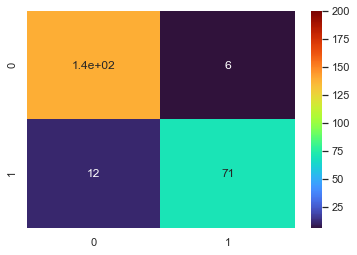

<Figure size 432x288 with 0 Axes>

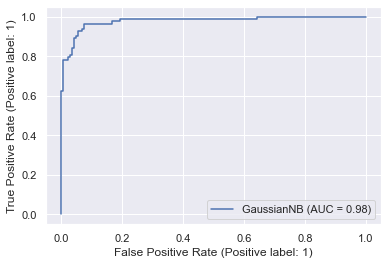

Naive bayes
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       145
           1       0.92      0.86      0.89        83

    accuracy                           0.92       228
   macro avg       0.92      0.91      0.91       228
weighted avg       0.92      0.92      0.92       228

Accuracy of Test: 0.92

Accuracy of Train: 0.91

F1_score of M 0.9391891891891893

F1_score of B 0.8875

AUC score 0.9784794349813045

Gaussiannb cross Score 
mean: 0.9067225586089116
min :0.8596491228070176
max :0.9469026548672567


In [53]:
nb=GaussianNB()#model object
nb.fit(x_train,y_train)#fitting data
y_pred=nb.predict(x_test)#prediction based on x test

#print(confusion_matrix(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap='turbo',vmax=200)
plt.show()

f1m.append(f1_score(y_test,y_pred,pos_label=0))

f1b.append(f1_score(y_test,y_pred,pos_label=1))
name.append('Naive Bayes')
acc.append(nb.score(x_test,y_test))
plt.savefig('image/selection/Heatmap/Gaussian_NB.png')

auc = roc_auc_score(y_test,nb.predict_proba(x_test)[:, 1])
plot_roc_curve(nb,x_test,y_test)
plt.savefig('image/selection/ROC_Curve/Gaussian_NB.png')
plt.show()
roc_auc.append(auc)

print('Naive bayes')
print(classification_report(y_test,y_pred)) 
print('Accuracy of Test: {:.2}\n'.format(nb.score(x_test,y_test)))
print('Accuracy of Train: {:.2}\n'.format(nb.score(x_train,y_train)))
print('F1_score of M',f1_score(y_test,y_pred,pos_label=0),end='\n\n')
print('F1_score of B',f1_score(y_test,y_pred,pos_label=1),end='\n\n')
print('AUC score',auc,end='\n\n')

acc_train.append(nb.score(x_train,y_train))
score=cross_val_score(nb,x,y,cv=5)
print('Gaussiannb cross Score \nmean: {}\nmin :{}\nmax :{}'.format(score.mean(),score.min(),score.max()))
cross_score.append(score.mean())

## Decision Tree Classifier

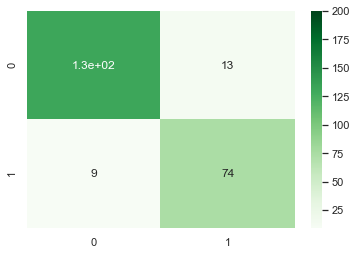

<Figure size 432x288 with 0 Axes>

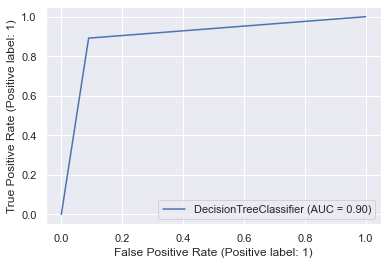

DecisionTreeClassifier
              precision    recall  f1-score   support

           0       0.94      0.91      0.92       145
           1       0.85      0.89      0.87        83

    accuracy                           0.90       228
   macro avg       0.89      0.90      0.90       228
weighted avg       0.91      0.90      0.90       228

Accuracy of Test: 0.9

Accuracy of Train: 1.0

F1_score of M 0.9230769230769231

F1_score of B 0.8705882352941176

AUC score 0.9009555463232239

Decision Tree 
mean: 0.9155410650520105
min :0.8771929824561403
max :0.9469026548672567


In [54]:
dt=DecisionTreeClassifier(random_state=32)
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)

#print(confusion_matrix(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap='Greens',vmax=200)
plt.show()

name.append('Decision Tree')
f1m.append(f1_score(y_test,y_pred,pos_label=0))
f1b.append(f1_score(y_test,y_pred,pos_label=1))
acc.append(lr.score(x_test,y_test))
plt.savefig('image/selection/Heatmap/Desicion_tree.png')

auc = roc_auc_score(y_test,dt.predict_proba(x_test)[:, 1])
plot_roc_curve(dt,x_test,y_test)
plt.savefig('image/selection/ROC_Curve/Desicion_tree.png')
plt.show()
roc_auc.append(auc)


print('DecisionTreeClassifier')
print(classification_report(y_test,y_pred))
print('Accuracy of Test: {:.2}\n'.format(dt.score(x_test,y_test)))
print('Accuracy of Train: {:.2}\n'.format(dt.score(x_train,y_train)))
print('F1_score of M',f1_score(y_test,y_pred,pos_label=0),end='\n\n')
print('F1_score of B',f1_score(y_test,y_pred,pos_label=1),end='\n\n')
print('AUC score',auc,end='\n\n')


acc_train.append(dt.score(x_train,y_train))
score=cross_val_score(dt,x,y,cv=5)
print('Decision Tree \nmean: {}\nmin :{}\nmax :{}'.format(score.mean(),score.min(),score.max()))
cross_score.append(score.mean())

## Random Forest Classification

fractal_dimension_mean


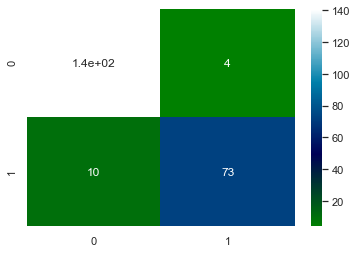

<Figure size 432x288 with 0 Axes>

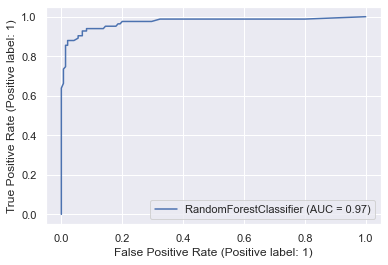

RandomForestClassifier
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       145
           1       0.95      0.88      0.91        83

    accuracy                           0.94       228
   macro avg       0.94      0.93      0.93       228
weighted avg       0.94      0.94      0.94       228

Accuracy of Test: 0.94

Accuracy of Train: 1.0

F1_score of M 0.9527027027027026

F1_score of B 0.9125

AUC score 0.9009555463232239

Random Forest 
mean: 0.9454743052321068
min :0.9210526315789473
max :0.9734513274336283


In [55]:
print(i)
rf=RandomForestClassifier(random_state=32) #setting n_estimator using accuracy
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

#print(confusion_matrix(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap='ocean')
plt.show()

f1m.append(f1_score(y_test,y_pred,pos_label=0))

f1b.append(f1_score(y_test,y_pred,pos_label=1))
name.append('Random Forest')
acc.append(lr.score(x_test,y_test))
plt.savefig('image/selection/Heatmap/random_forest.png')


auc = roc_auc_score(y_test,dt.predict_proba(x_test)[:, 1])
plot_roc_curve(rf,x_test,y_test)
plt.savefig('image/selection/ROC_Curve/Random_forest.png')
plt.show()
roc_auc.append(auc)

print('RandomForestClassifier')
print(classification_report(y_test,y_pred))
print('Accuracy of Test: {:.2}\n'.format(rf.score(x_test,y_test)))
print('Accuracy of Train: {:.2}\n'.format(rf.score(x_train,y_train)))
print('F1_score of M',f1_score(y_test,y_pred,pos_label=0),end='\n\n')
print('F1_score of B',f1_score(y_test,y_pred,pos_label=1),end='\n\n')
print('AUC score',auc,end='\n\n')

acc_train.append(rf.score(x_train,y_train))
score=cross_val_score(rf,x,y,cv=5)
print('Random Forest \nmean: {}\nmin :{}\nmax :{}'.format(score.mean(),score.min(),score.max()))
cross_score.append(score.mean())

## Support vector classification

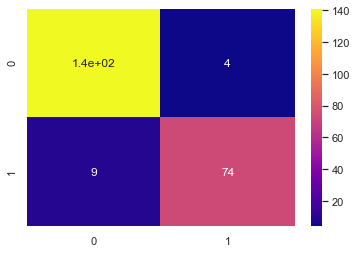

<Figure size 432x288 with 0 Axes>

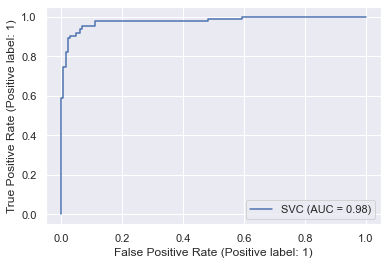

SVC
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       145
           1       0.95      0.89      0.92        83

    accuracy                           0.94       228
   macro avg       0.94      0.93      0.94       228
weighted avg       0.94      0.94      0.94       228

Accuracy of Test: 0.94

Accuracy of Train: 0.95

F1_score of M 0.9559322033898304

F1_score of B 0.9192546583850931

AUC score 0.9775654341503947


Support Vector Classification 
mean: 0.9419189566837447
min :0.9210526315789473
max :0.956140350877193


In [56]:
svc=SVC() #setting c and gamma value using searchgridCV
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)

#print(confusion_matrix(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap='plasma')
plt.show()

f1m.append(f1_score(y_test,y_pred,pos_label=0))

f1b.append(f1_score(y_test,y_pred,pos_label=1))
name.append('Support Vector')
acc.append(lr.score(x_test,y_test))
plt.savefig('image/selection/Heatmap/SVC.png')


auc = roc_auc_score(y_test,svc.decision_function(x_test))
plot_roc_curve(svc,x_test,y_test)
plt.savefig('image/selection/ROC_Curve/Support_vector.png')
plt.show()
roc_auc.append(0.5)



print('SVC')
print(classification_report(y_test,y_pred))
print('Accuracy of Test: {:.2}\n'.format(svc.score(x_test,y_test)))
print('Accuracy of Train: {:.2}\n'.format(svc.score(x_train,y_train)))
print('F1_score of M',f1_score(y_test,y_pred,pos_label=0),end='\n\n')
print('F1_score of B',f1_score(y_test,y_pred,pos_label=1),end='\n\n')
print('AUC score',auc,end='\n\n')

acc_train.append(svc.score(x_train,y_train))
score=cross_val_score(svc,x,y,cv=5)
print('\nSupport Vector Classification \nmean: {}\nmin :{}\nmax :{}'.format(score.mean(),score.min(),score.max()))
cross_score.append(score.mean())

## Gradient Boosting

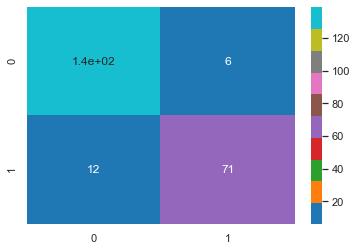

<Figure size 432x288 with 0 Axes>

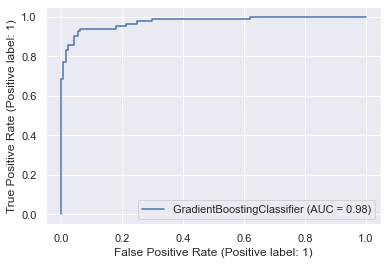

GradientBoostingClassifier
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       145
           1       0.92      0.86      0.89        83

    accuracy                           0.92       228
   macro avg       0.92      0.91      0.91       228
weighted avg       0.92      0.92      0.92       228

Accuracy of Test: 0.92
Accuracy of Train: 1.0
F1_score of M 0.9391891891891893
F1_score of B 0.8875
AUC score 0.975238886580806
(568, 6)
(568, 6)
Gradient Boosting 
mean: 0.9454432541530817
min :0.9210526315789473
max :0.9646017699115044


In [57]:
gbc=GradientBoostingClassifier(random_state=32)
gbc.fit(x_train,y_train)
y_pred=gbc.predict(x_test)

#print(confusion_matrix(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap='tab10')
plt.show()

f1m.append(f1_score(y_test,y_pred,pos_label=0))

f1b.append(f1_score(y_test,y_pred,pos_label=1))
name.append('Gradient Boosting')
acc.append(lr.score(x_test,y_test))
plt.savefig('image/selection/Heatmap/Gradiant_boosting.png')

auc = roc_auc_score(y_test,gbc.predict_proba(x_test)[:, 1])
plot_roc_curve(gbc,x_test,y_test)
plt.savefig('image/selection/ROC_Curve/Gradient_boosting.png')
plt.show()
roc_auc.append(auc)

print('GradientBoostingClassifier')
print(classification_report(y_test,y_pred))
print('Accuracy of Test: {:.2}'.format(gbc.score(x_test,y_test)))
print('Accuracy of Train: {:.2}'.format(gbc.score(x_train,y_train)))
print('F1_score of M',f1_score(y_test,y_pred,pos_label=0))
print('F1_score of B',f1_score(y_test,y_pred,pos_label=1))
print('AUC score',auc)


acc_train.append(gbc.score(x_train,y_train))
print(x.shape)
score=cross_val_score(gbc,x,y,cv=5)
print(x.shape)
print('Gradient Boosting \nmean: {}\nmin :{}\nmax :{}'.format(score.mean(),score.min(),score.max()))
cross_score.append(score.mean())

# Model Selection

#### Creating Dataframe for Model selection purpose

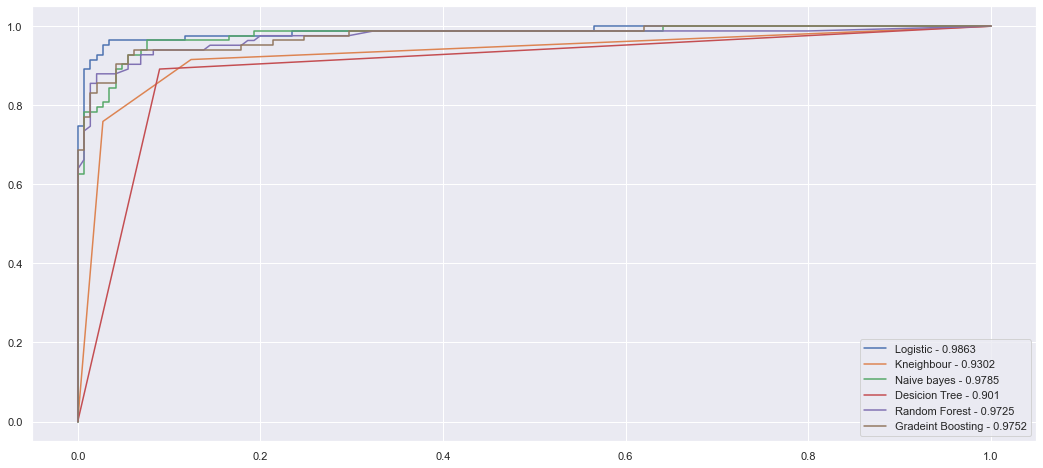

<Figure size 432x288 with 0 Axes>

In [58]:
dic={'Logistic':lr,'Kneighbour':knn,'Naive bayes':nb,'Desicion Tree':dt,'Random Forest':rf,'Gradeint Boosting':gbc}
plt.figure(figsize=(18,8))
var=[]
for i in dic.keys():
    y_pred=dic[i].predict_proba(x_test)
    fpr,tpr,threshold=roc_curve(y_test,y_pred[:,1])
    #print(i)
    plt.plot(fpr,tpr)
    var.append(i+' - {:.4}'.format(roc_auc_score(y_test,y_pred[:,1])))
#print(var)
plt.legend(labels=var)
plt.show()
plt.savefig('image/selection/ROC_Curve/cumulative_curve.jpeg')


In [59]:
dic={'Model':name,'Accuracy Test':acc,'M F1 score':f1m,'B F1 score':f1b,'AUC':roc_auc,"Cross_val_score":cross_score,'Accuracy Train':acc_train}
result=pd.DataFrame(dic)
result


import dataframe_image as img
img.export(result,'Model selection Table.jpeg')


## Model Selection with Accuracy & F1 score

Plot the Accuracy for both test and train data,Cross validation,f1 score,Auc score(roc_curve) using bar plot

In [60]:
import plotly.graph_objects as go
model=result['Model']
fig = go.Figure(go.Bar(x=model, y=result['Accuracy Test'], name='Accuracy Test'))
fig.add_trace(go.Bar(x=model, y=result['Cross_val_score'], name='Cross Score'))
fig.add_trace(go.Bar(x=model, y=result['Accuracy Train'], name='Accuracy Train'))
fig.add_trace(go.Bar(x=model, y=result['M F1 score'], name='F1 M score'))
fig.add_trace(go.Bar(x=model, y=result['B F1 score'], name='F1 B score'))
fig.add_trace(go.Bar(x=model, y=result['AUC'], name='AUC Score'))
fig.update_layout(barmode='overlay',yaxis_range=[0.8,1])
fig.update_xaxes()
fig.update_traces(opacity=0.4)
fig.show()
fig.write_image('image/selection/model_selection.png')


From above graph, logistic and Gradient Boosting has above 0.92 score in AUC,F1 and Cross val scores and  so we taking above model for future scope.
And we leave Desicion tree,Kneighbors,Naive Bayes,SVC and random forest because of low AUC , cross and accuracy of test even they had high accuracy of train data,this may be leads to overfit.

In [61]:
acc_train=[]
acc=[]# accuracy
name=[] # model name
f1m=[] # f1 score M
f1b=[] # f1 score B
roc_auc=[]
cross_score=[]

## Tuning with Hyper Paramters

Tuning parameters using GridSearchCV and RepeatedStratifiedKFold

In [62]:
from sklearn.model_selection import GridSearchCV,RepeatedStratifiedKFold

# Logistic Tuning

In [63]:
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
penalty =  ['none', 'l1', 'l2', 'elasticnet']
c_values = [100, 10, 1.0, 0.1, 0.01]



grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x, y)


print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.938356 using {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}


In [64]:
#means = grid_result.cv_results_['mean_test_score']
#stds = grid_result.cv_results_['std_test_score']
#params = grid_result.cv_results_['params']
#for mean, stdev, param in zip(means, stds, params):
    #print("%f (%f) with: %r" % (mean, stdev, param))

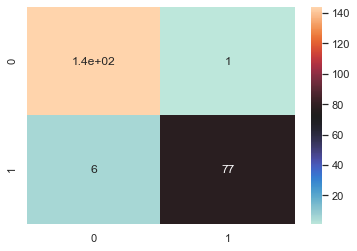

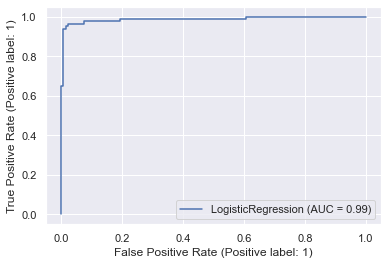

LogisticRegression
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       145
           1       0.99      0.93      0.96        83

    accuracy                           0.97       228
   macro avg       0.97      0.96      0.97       228
weighted avg       0.97      0.97      0.97       228

Accuracy of Test: 0.97

Accuracy of Train: 0.92

F1_score of M 0.976271186440678

F1_score of B 0.9565217391304347

AUC score 0.9870378063980058

Logistic Regression cross Score 
mean: 0.9383946592144076
min :0.9122807017543859
max :0.9646017699115044


In [65]:
lr = LogisticRegression(random_state=32,C=0.01,penalty='l2',solver='liblinear')
lr.fit(x_train,y_train)# fitting the model
y_pred=lr.predict(x_test) #prediction based on x test



f1b.append(f1_score(y_test,y_pred,pos_label=1)) # append f1 score of B to the model
f1m.append(f1_score(y_test,y_pred,pos_label=0)) # append f1 score of M to the model
name.append('LogisticRegression')
acc.append(lr.score(x_test,y_test))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap='icefire')
plt.savefig('image/selection/Heatmap/Logistic_Regression.png')
# visualize confusion matrix in heatmap



auc = roc_auc_score(y_test,lr.predict_proba(x_test)[:, 1])# getting roc curve by predict_proba method
plot_roc_curve(lr,x_test,y_test)
plt.savefig('image/selection/ROC_Curve/Logistic_Regression.png')
plt.show()
roc_auc.append(auc)

print('LogisticRegression')
print(classification_report(y_test,y_pred)) # getting classification report
print('Accuracy of Test: {:.2}'.format(lr.score(x_test,y_test)),end='\n\n')
print('Accuracy of Train: {:.2}'.format(lr.score(x_train,y_train)),end='\n\n')


# getting accuracy
print('F1_score of M',f1_score(y_test,y_pred,pos_label=0),end='\n\n') #getting f1 score for M
print('F1_score of B',f1_score(y_test,y_pred,pos_label=1),end='\n\n')#getting f1 score for M
print('AUC score',auc,end='\n\n')

acc_train.append(lr.score(x_train,y_train))
#print(x.shape)
score=cross_val_score(lr,x,y,cv=5)
#print(x.shape)
print('Logistic Regression cross Score \nmean: {}\nmin :{}\nmax :{}'.format(score.mean(),score.min(),score.max()))
cross_score.append(score.mean())

# Gradiant Boosting Tuning

In [66]:
#model = GradientBoostingClassifier()
#n_estimators = [10, 100, 1000]
#learning_rate = [0.001, 0.01, 0.1]
#subsample = [0.5, 0.7, 1.0]
#max_depth = [3, 7, 9]


In [67]:
# define grid search
#grid = dict(learning_rate=learning_rate, n_estimators=n_estimators, subsample=subsample, max_depth=max_depth)
#cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
#grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
#grid_result = grid_search.fit(x, y)


In [68]:
# summarize results
#print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
#means = grid_result.cv_results_['mean_test_score']
#stds = grid_result.cv_results_['std_test_score']
#params = grid_result.cv_results_['params']
#for mean, stdev, param in zip(means, stds, params):
   # print("%f (%f) with: %r" % (mean, stdev, param))

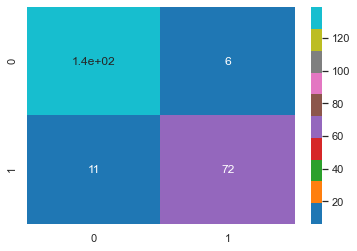

<Figure size 432x288 with 0 Axes>

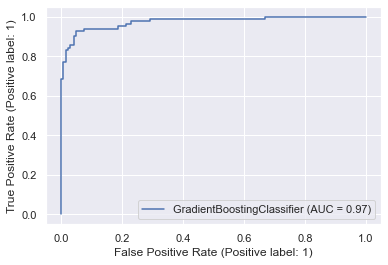

GradientBoostingClassifier
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       145
           1       0.92      0.87      0.89        83

    accuracy                           0.93       228
   macro avg       0.92      0.91      0.92       228
weighted avg       0.93      0.93      0.92       228

Accuracy of Test: 0.93
Accuracy of Train: 1.0
F1_score of M 0.9423728813559322
F1_score of B 0.8944099378881989
AUC score 0.9748234316576652
(568, 6)
(568, 6)
Gradient Boosting 
mean: 0.9436888681881695
min :0.9122807017543859
max :0.9646017699115044


In [69]:
gbc=GradientBoostingClassifier(random_state=32,learning_rate=0.01,max_depth=3,n_estimators=1000,subsample=1.0)
gbc.fit(x_train,y_train)
y_pred=gbc.predict(x_test)

#print(confusion_matrix(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap='tab10')
plt.show()

f1m.append(f1_score(y_test,y_pred,pos_label=0))

f1b.append(f1_score(y_test,y_pred,pos_label=1))
name.append('Gradient Boosting')
acc.append(lr.score(x_test,y_test))
plt.savefig('image/selection/Heatmap/Gradiant_boosting.png')

auc = roc_auc_score(y_test,gbc.predict_proba(x_test)[:, 1])
plot_roc_curve(gbc,x_test,y_test)
plt.savefig('image/selection/ROC_Curve/Gradient_boosting.png')
plt.show()
roc_auc.append(auc)

print('GradientBoostingClassifier')
print(classification_report(y_test,y_pred))
print('Accuracy of Test: {:.2}'.format(gbc.score(x_test,y_test)))
print('Accuracy of Train: {:.2}'.format(gbc.score(x_train,y_train)))
print('F1_score of M',f1_score(y_test,y_pred,pos_label=0))
print('F1_score of B',f1_score(y_test,y_pred,pos_label=1))
print('AUC score',auc)


acc_train.append(gbc.score(x_train,y_train))
print(x.shape)
score=cross_val_score(gbc,x,y,cv=5)
print(x.shape)
print('Gradient Boosting \nmean: {}\nmin :{}\nmax :{}'.format(score.mean(),score.min(),score.max()))
cross_score.append(score.mean())

# Model selection after tuning

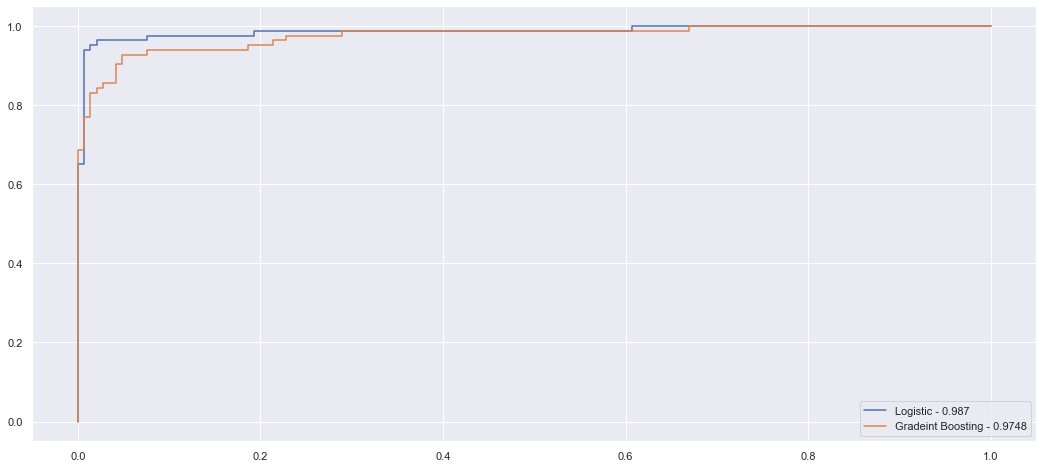

<Figure size 432x288 with 0 Axes>

In [70]:
dic={'Logistic':lr,'Gradeint Boosting':gbc}
plt.figure(figsize=(18,8))
var=[]
for i in dic.keys():
    y_pred=dic[i].predict_proba(x_test)
    fpr,tpr,threshold=roc_curve(y_test,y_pred[:,1])
    #print(i)
    plt.plot(fpr,tpr)
    var.append(i+' - {:.4}'.format(roc_auc_score(y_test,y_pred[:,1])))
#print(var)
plt.legend(labels=var)
plt.show()
plt.savefig('image/selection/ROC_Curve/cumulative_curve.jpeg')

In [71]:
dic={'Model':name,'Accuracy Test':acc,'M F1 score':f1m,'B F1 score':f1b,'AUC':roc_auc,"Cross_val_score":cross_score,'Accuracy Train':acc_train}
res=pd.DataFrame(dic)
res


import dataframe_image as img
img.export(result,'Model selection Table.jpeg')


In [72]:
com=pd.concat([result[result['Model']=='LogisticRegression'],res[res['Model']=='LogisticRegression'],result[result['Model']=='Gradient Boosting'],res[res['Model']=='Gradient Boosting']])
com.set_index([pd.Index(['Before','After',"Before",'After'])])

Model  Accuracy Test  M F1 score  B F1 score       AUC  \
Before  LogisticRegression       0.960526    0.969492    0.944099  0.986290   
After   LogisticRegression       0.969298    0.976271    0.956522  0.987038   
Before   Gradient Boosting       0.960526    0.939189    0.887500  0.975239   
After    Gradient Boosting       0.969298    0.942373    0.894410  0.974823   

        Cross_val_score  Accuracy Train  
Before         0.933132        0.926471  
After          0.938395        0.923529  
Before         0.945443        1.000000  
After          0.943689        1.000000

In [73]:
img.export(result,'Model Comparision.jpeg')

In [74]:
import plotly.graph_objects as go
model=res['Model']
fig = go.Figure(go.Bar(x=model, y=res['Accuracy Test'], name='Accuracy Test'))
fig.add_trace(go.Bar(x=model, y=res['Cross_val_score'], name='Cross Score'))
fig.add_trace(go.Bar(x=model, y=res['Accuracy Train'], name='Accuracy Train'))
fig.add_trace(go.Bar(x=model, y=result['M F1 score'], name='F1 M score'))
fig.add_trace(go.Bar(x=model, y=result['B F1 score'], name='F1 B score'))
fig.add_trace(go.Bar(x=model, y=res['AUC'], name='AUC Score'))
fig.update_layout(barmode='overlay',yaxis_range=[0.8,1])
fig.update_xaxes()
fig.update_traces(opacity=0.3)
fig.show()
fig.write_image('image/selection/model_selection_after_tuning.png')

# Conclusion

From the above graph,
Gradient boosting has high Cross_validation and Accuracy of test data.So it is good model.If we take the accuracy of train data,it shows '1'.It may leads to overfit.

And per Area under curve score logistic beats gradient boosting

So We conculde that We can use Both Logistic and Gradient Boosting model.

#### saving model for future refernce

In [75]:
import pickle

# Save tuple
pickle.dump(gbc, open("model/gradient_model.pkl", 'wb'))
pickle.dump(lr, open("model/logistic_model.pkl", 'wb'))
# Restore tuple
gbc_model = pickle.load(open("model/logistic_model.pkl", 'rb'))
lr_model = pickle.load(open("model/gradient_model.pkl", 'rb'))

pickle.dump(sd,open("model/scalar.pkl",'wb'))

In [76]:
sc=StandardScaler()
y_pred=gbc_model.predict(sc.fit_transform([[20.57,17.770,0.08474,0.078640,0.1812,0.056670]])) #predicting model for dynamic data
y_pred

array([0])

In [77]:
y_pred=gbc_model.predict(sd.transform([[20.57,17.770,0.08474,0.078640,0.1812,0.056670]])) #predicting model for dynamic data
y_pred

array([1])

                                                                             By Muthu Periyal and Hariharan 